# Deep Learning | Model Optimization

### Dataset: MNIST Fashion| Framework: Keras (Tensorflow)

🎯 Objective: Move from a basic MLP to a well-tuned model and benchmark against classical ML methods.
- Baseline MLP typically scores ~58–60% accuracy.
- Deep regularized MLPs can achieve ~80–94% with tuning.
- Tree-based methods like Random Forest or XGBoost may reach ~97%.

## 📌 Step 1: Load and Preprocess the Data

In [ ]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
import tensorflow as tf

In [ ]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Set memory growth to avoid OOM error
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        tf.config.set_visible_devices(gpus[0], 'GPU')  # Use only the first GPU
    except RuntimeError as e:
        print(e)


In [ ]:
# Load data
data = fetch_covtype()
X, y = data.data, data.target - 1  # make 0-indexed

In [ ]:
X.shape

(581012, 54)

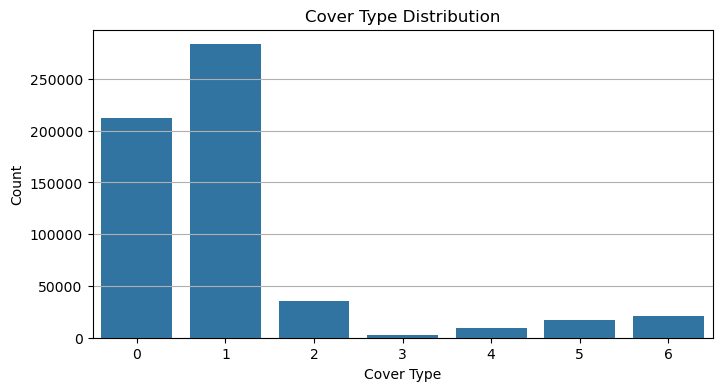

In [ ]:
# Class distribution
plt.figure(figsize=(8,4))
sns.countplot(x=y)
plt.title("Cover Type Distribution")
plt.xlabel("Cover Type")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()

In [ ]:
print("\nClass distribution:")
print(pd.Series(y).value_counts().sort_index())


Class distribution:
0    211840
1    283301
2     35754
3      2747
4      9493
5     17367
6     20510
Name: count, dtype: int64


In [ ]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
X_train.shape

(464809, 54)

In [ ]:
# Standardize inputs
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# # One-hot encode labels
# y_train_cat = to_categorical(y_train, num_classes=7)
# y_test_cat = to_categorical(y_test, num_classes=7)

## 📌 Step 2: Define and Train a Baseline MLP Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, LeakyReLU, BatchNormalization, Activation, Dropout
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
baseline_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')
])

baseline_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │         7,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,607 (68.78 KB)

 Trainable params: 17,607 (68.78 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
baseline_model.compile(optimizer=Adam(learning_rate=0.01),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

In [ ]:
history_baseline = baseline_model.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=30,
                                      batch_size=256,
                                      verbose=1)

Epoch 1/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7376 - loss: 0.6191 - val_accuracy: 0.7954 - val_loss: 0.4961
Epoch 2/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8115 - loss: 0.4536 - val_accuracy: 0.8220 - val_loss: 0.4281
Epoch 3/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8314 - loss: 0.4082 - val_accuracy: 0.8435 - val_loss: 0.3838
Epoch 4/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8426 - loss: 0.3842 - val_accuracy: 0.8463 - val_loss: 0.3764
Epoch 5/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8502 - loss: 0.3679 - val_accuracy: 0.8540 - val_loss: 0.3663
Epoch 6/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8549 - loss: 0.3561 - val_accuracy: 0.8566 - val_loss: 0.3584
Epoch 7/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8591 - loss: 0.3501 - val_accuracy: 0.8606 - val_loss: 0.3459
Epoch 8/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8646 - loss: 0.3372 - 

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def plot_learning_curves(history, title='Model'):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Train Accuracy')
    plt.plot(epochs, val_acc, 'r--', label='Val Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Train Loss')
    plt.plot(epochs, val_loss, 'r--', label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

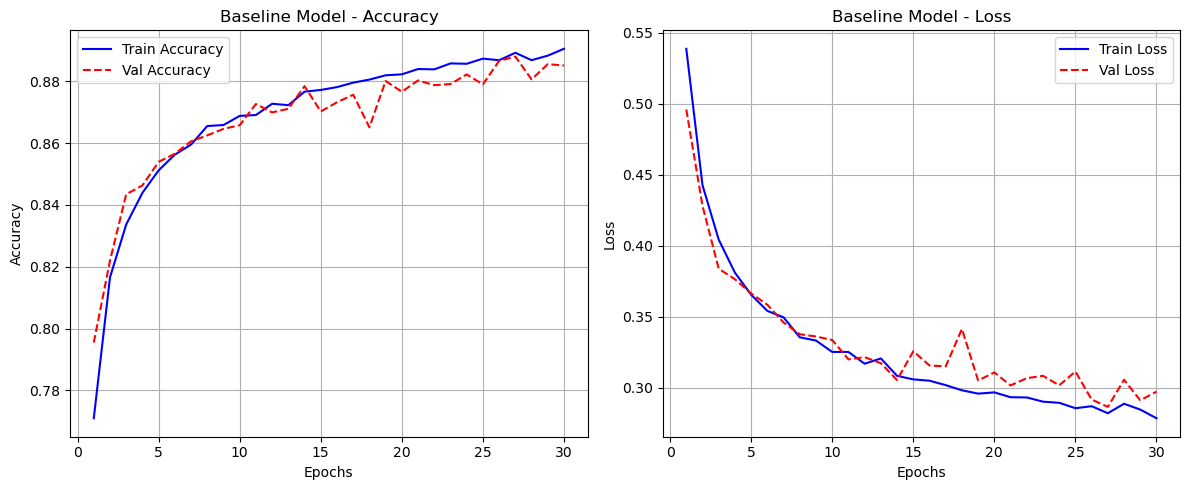

In [ ]:
plot_learning_curves(history_baseline, title='Baseline Model')

In [ ]:
loss1, acc1 = baseline_model.evaluate(X_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8856 - loss: 0.2998
Test accuracy : 88.50%
Test loss     : 30.04%


# 3.1 NEURAL NETWORK ARCHITECTURE

Modify the baseline MLP architecture by exploring deeper or wider configurations.



*   Added another dense layer
*   Using Relu






In [ ]:
baseline_model_more_layers = Sequential([
    Input(shape=(X_train.shape[1],)),
    #Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')
])

baseline_model_more_layers.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 256)            │        14,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,543 (224.78 KB)

 Trainable params: 57,543 (224.78 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
baseline_model_more_layers.compile(optimizer=Adam(learning_rate=0.01),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

In [ ]:
history_baseline_more_layers = baseline_model_more_layers.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=30,
                                      batch_size=256,
                                      verbose=1)

Epoch 1/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7356 - loss: 0.6227 - val_accuracy: 0.8074 - val_loss: 0.4616
Epoch 2/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8121 - loss: 0.4476 - val_accuracy: 0.8299 - val_loss: 0.4149
Epoch 3/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8342 - loss: 0.3980 - val_accuracy: 0.8431 - val_loss: 0.3793
Epoch 4/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8467 - loss: 0.3733 - val_accuracy: 0.8522 - val_loss: 0.3584
Epoch 5/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8554 - loss: 0.3553 - val_accuracy: 0.8575 - val_loss: 0.3500
Epoch 6/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8619 - loss: 0.3433 - val_accuracy: 0.8578 - val_loss: 0.3552
Epoch 7/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8649 - loss: 0.3357 - val_accuracy: 0.8673 - val_loss: 0.3307
Epoch 8/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8698 - loss: 0.3269 - 

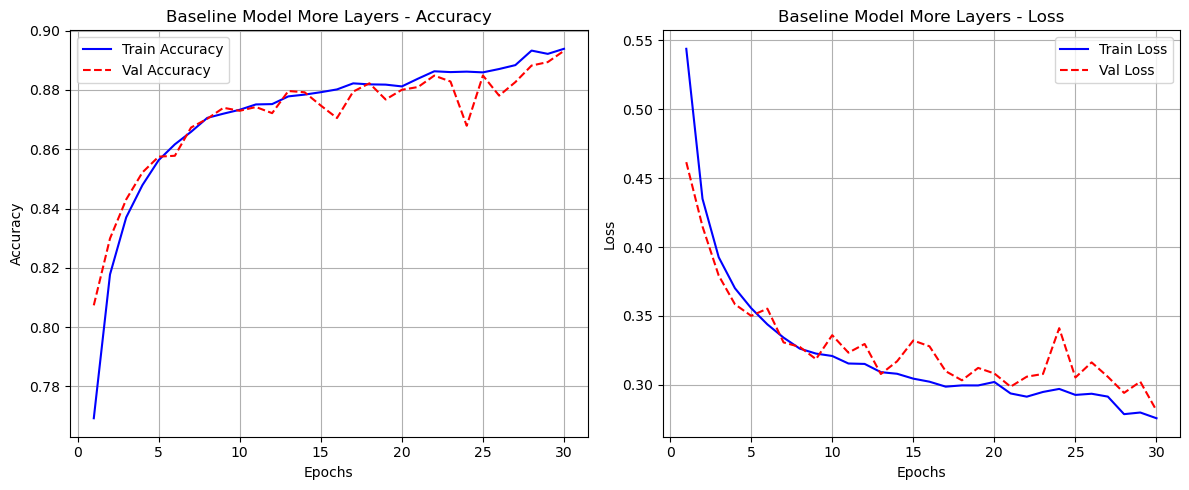

In [ ]:
plot_learning_curves(history_baseline_more_layers, title='Baseline Model More Layers')

In [ ]:
loss1, acc1 = baseline_model_more_layers.evaluate(X_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8926 - loss: 0.2815
Test accuracy : 89.19%
Test loss     : 28.40%


By adding more dense layer model gives better results
and it is slightly overfit

Experiment with different activation functions (e.g., ReLU, LeakyReLU, SELU).

In [ ]:
baseline_model_LeakyReLU = Sequential([
    Input(shape=(X_train.shape[1],)),
    # Dense(512),
    # LeakyReLU(alpha=0.01),
    Dense(256),
    LeakyReLU(alpha=0.01),
    Dense(128),
    LeakyReLU(alpha=0.01),
    Dense(64),
    LeakyReLU(alpha=0.01),
    Dense(32),
    LeakyReLU(alpha=0.01),
    Dense(7, activation='softmax')
])

baseline_model_LeakyReLU.summary()

baseline_model_LeakyReLU.compile(optimizer=Adam(learning_rate=0.01),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

history_baseline_LeakyReLU = baseline_model_LeakyReLU.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=30,
                                      batch_size=256,
                                      verbose=1)

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 256)            │        14,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,543 (224.78 KB)

 Trainable params: 57,543 (224.78 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7332 - loss: 0.6267 - val_accuracy: 0.7751 - val_loss: 0.5444
Epoch 2/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8061 - loss: 0.4602 - val_accuracy: 0.8165 - val_loss: 0.4415
Epoch 3/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8325 - loss: 0.4029 - val_accuracy: 0.8441 - val_loss: 0.3855
Epoch 4/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8480 - loss: 0.3765 - val_accuracy: 0.8536 - val_loss: 0.3672
Epoch 5/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8608 - loss: 0.3443 - val_accuracy: 0.8667 - val_loss: 0.3317
Epoch 6/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8712 - loss: 0.3195 - val_accuracy: 0.8694 - val_loss: 0.3256
Epoch 7/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8787 - loss: 0.3005 - val_accuracy: 0.8747 - val_loss: 0.3113
Epoch 8/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8818 - loss: 0.2938 - 

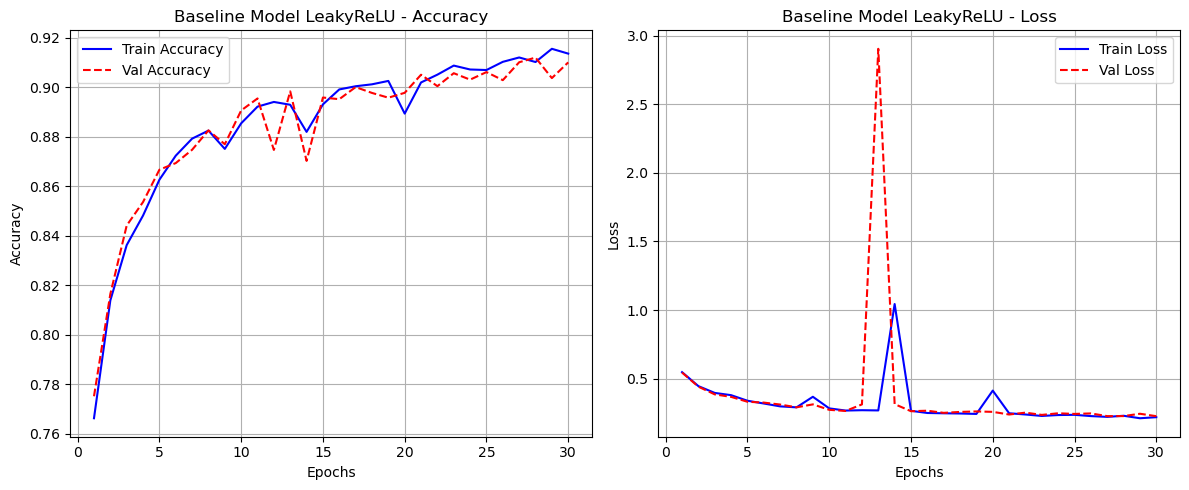

In [ ]:
plot_learning_curves(history_baseline_LeakyReLU, title='Baseline Model LeakyReLU')

In [ ]:
loss1, acc1 = baseline_model_LeakyReLU.evaluate(X_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9088 - loss: 0.2275
Test accuracy : 90.81%
Test loss     : 22.98%


leakyrelu gives better results than Relu but still slightly overfit so we will be using Leakyrelu from now on

**Apply Batch Normalization.**

In [ ]:
baseline_model_Batch_Norm = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(512),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(256),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(128),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(64),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(32),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(7, activation='softmax')
])

baseline_model_Batch_Norm.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 512)            │        28,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,919 (808.28 KB)

 Trainable params: 204,935 (800.53 KB)

 Non-trainable params: 1,984 (7.75 KB)

In [ ]:
baseline_model_Batch_Norm.compile(optimizer=Adam(learning_rate=0.01),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

In [ ]:
history_baseline_Batch_Norm = baseline_model_Batch_Norm.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=30,
                                      batch_size=256,
                                      verbose=1)

Epoch 1/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7436 - loss: 0.6174 - val_accuracy: 0.8165 - val_loss: 0.4413
Epoch 2/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8308 - loss: 0.4030 - val_accuracy: 0.8581 - val_loss: 0.3494
Epoch 3/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8612 - loss: 0.3358 - val_accuracy: 0.8825 - val_loss: 0.2921
Epoch 4/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8772 - loss: 0.3000 - val_accuracy: 0.8837 - val_loss: 0.2841
Epoch 5/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8868 - loss: 0.2738 - val_accuracy: 0.8992 - val_loss: 0.2491
Epoch 6/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8948 - loss: 0.2550 - val_accuracy: 0.9021 - val_loss: 0.2395
Epoch 7/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9001 - loss: 0.2411 - val_accuracy: 0.9097 - val_loss: 0.2222
Epoch 8/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9055 - loss: 0

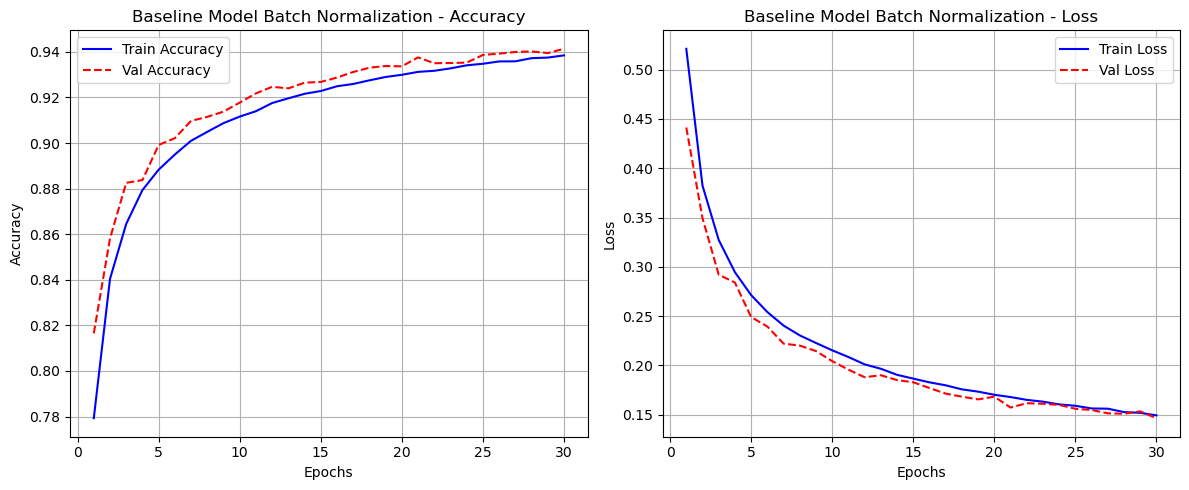

In [ ]:
plot_learning_curves(history_baseline_Batch_Norm, title='Baseline Model Batch Normalization')

In [ ]:
loss1, acc1 = baseline_model_Batch_Norm.evaluate(X_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9406 - loss: 0.1457
Test accuracy : 94.07%
Test loss     : 14.72%


By adding batch normalization we improve accuracy and rduce loss, and also learning curve is also much better now.


# 3.2 REGULARIZATION TECHNIQUES

Apply Dropout to prevent overfitting and experiment with different dropout rates.

In [ ]:
baseline_model_DropOut = Sequential([
    Input(shape=(X_train.shape[1],)),

    Dense(512),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.1),

    Dense(256),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.1),

    Dense(128),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.1),

    Dense(64),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.1),

    Dense(32),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.1),

    Dense(7, activation='softmax')
])

baseline_model_DropOut.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                │ (None, 512)            │        28,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_12 (LeakyReLU)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_13 (LeakyReLU)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,919 (808.28 KB)

 Trainable params: 204,935 (800.53 KB)

 Non-trainable params: 1,984 (7.75 KB)

In [ ]:
baseline_model_DropOut.compile(optimizer=Adam(learning_rate=0.01),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

In [ ]:
history_baseline_DropOut = baseline_model_DropOut.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=30,
                                      batch_size=256,
                                      verbose=1)

Epoch 1/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.7278 - loss: 0.6512 - val_accuracy: 0.8095 - val_loss: 0.4571
Epoch 2/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8026 - loss: 0.4668 - val_accuracy: 0.8399 - val_loss: 0.3800
Epoch 3/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8256 - loss: 0.4130 - val_accuracy: 0.8550 - val_loss: 0.3446
Epoch 4/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8444 - loss: 0.3751 - val_accuracy: 0.8700 - val_loss: 0.3148
Epoch 5/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8548 - loss: 0.3523 - val_accuracy: 0.8770 - val_loss: 0.2983
Epoch 6/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8614 - loss: 0.3356 - val_accuracy: 0.8856 - val_loss: 0.2789
Epoch 7/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8681 - loss: 0.3197 - val_accuracy: 0.8937 - val_loss: 0.2606
Epoch 8/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8733 - loss: 0

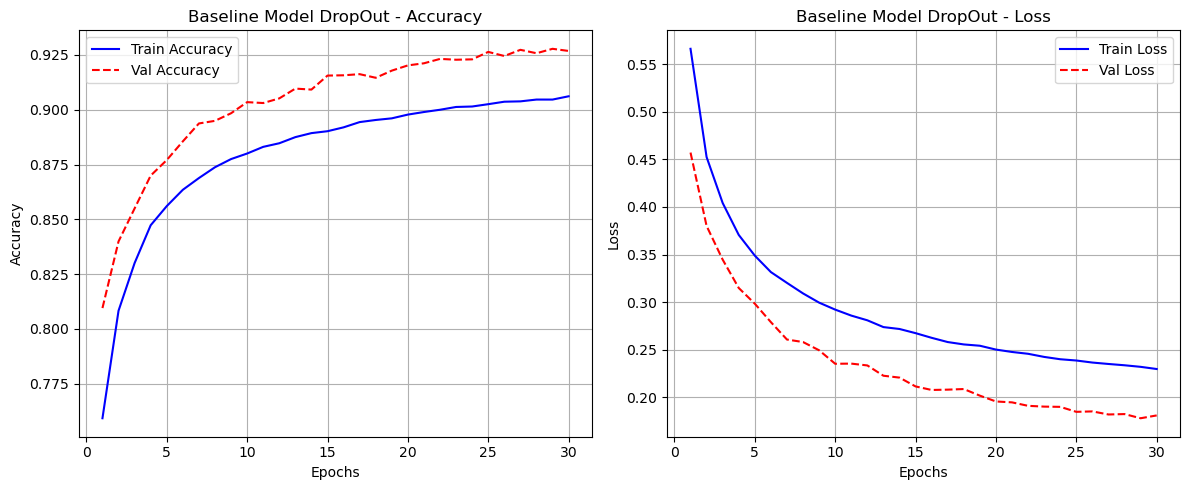

In [ ]:
plot_learning_curves(history_baseline_DropOut, title='Baseline Model DropOut')

In [ ]:
loss1, acc1 = baseline_model_DropOut.evaluate(X_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9247 - loss: 0.1811
Test accuracy : 92.54%
Test loss     : 18.13%


By adding drop out it reduce the test accuracy and increase the loss. but the curves are better now


Add L2 regularization to Dense layers and

In [ ]:
from tensorflow.keras.regularizers import l2

baseline_model_L2_Reg = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(512, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(256, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(128, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(64, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(32, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(7, activation='softmax')

])
baseline_model_L2_Reg.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                │ (None, 512)            │        28,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_14 (LeakyReLU)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_15 (LeakyReLU)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_16 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_17 (LeakyReLU)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_18 (LeakyReLU)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,919 (808.28 KB)

 Trainable params: 204,935 (800.53 KB)

 Non-trainable params: 1,984 (7.75 KB)

In [ ]:
baseline_model_L2_Reg.compile(optimizer=Adam(learning_rate=0.01),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

In [ ]:
history_baseline_L2_Reg = baseline_model_L2_Reg.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=30,
                                      batch_size=256,
                                      verbose=1)

Epoch 1/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7300 - loss: 0.7337 - val_accuracy: 0.7835 - val_loss: 0.5963
Epoch 2/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7793 - loss: 0.5915 - val_accuracy: 0.7946 - val_loss: 0.5584
Epoch 3/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7998 - loss: 0.5426 - val_accuracy: 0.8103 - val_loss: 0.5255
Epoch 4/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8103 - loss: 0.5205 - val_accuracy: 0.8000 - val_loss: 0.5526
Epoch 5/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8161 - loss: 0.5112 - val_accuracy: 0.8174 - val_loss: 0.5035
Epoch 6/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8193 - loss: 0.4987 - val_accuracy: 0.8250 - val_loss: 0.4846
Epoch 7/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8221 - loss: 0.4936 - val_accuracy: 0.8306 - val_loss: 0.4809
Epoch 8/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8251 - loss: 0

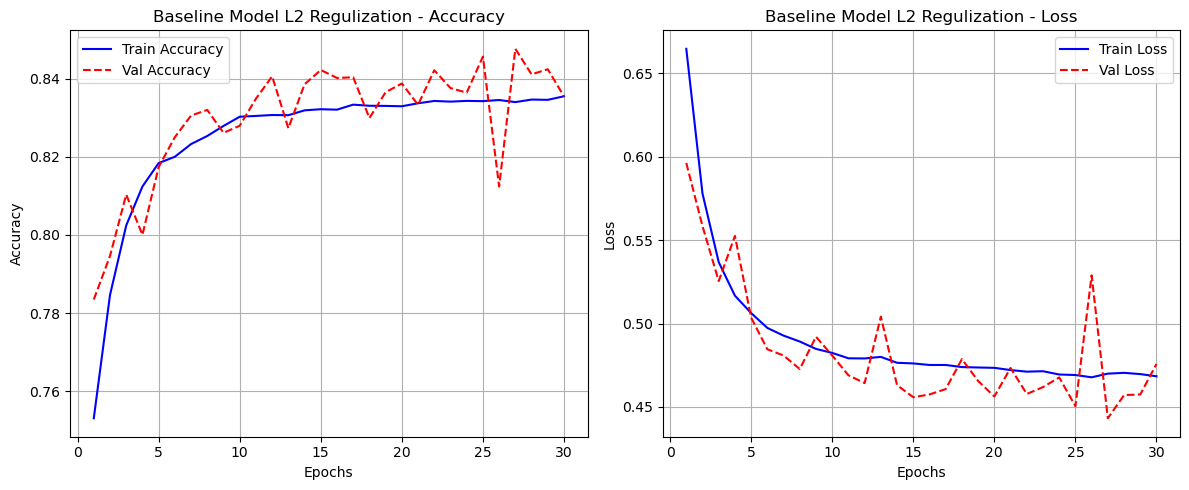

In [ ]:
plot_learning_curves(history_baseline_L2_Reg, title='Baseline Model L2 Regulization')

In [ ]:
loss1, acc1 = baseline_model_L2_Reg.evaluate(X_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8327 - loss: 0.4791
Test accuracy : 83.37%
Test loss     : 47.74%


Using only L2 regulazatin not fit. it reduce accuracy and increases the loss. model is going underfit.

Lets 1 more test with dropout and l2 regulazation together.

In [ ]:
baseline_model_Dropout_L2_Batch = Sequential([
    Input(shape=(X_train.shape[1],)),

    Dense(512, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.1),

    Dense(256, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.1),

    Dense(128, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.1),

    Dense(64, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.1),

    Dense(32, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.1),

    Dense(7, activation='softmax')

])
baseline_model_Dropout_L2_Batch.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_41 (Dense)                │ (None, 512)            │        28,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_19 (LeakyReLU)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_20 (LeakyReLU)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_21 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_22 (LeakyReLU)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_23 (LeakyReLU)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,919 (808.28 KB)

 Trainable params: 204,935 (800.53 KB)

 Non-trainable params: 1,984 (7.75 KB)

In [ ]:

baseline_model_Dropout_L2_Batch.compile(optimizer=Adam(learning_rate=0.001),  # Reduced learning rate
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

In [ ]:
history_baseline_Dropout_L2_Batch = baseline_model_Dropout_L2_Batch.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=30,
                                      batch_size=256,
                                      verbose=1)

Epoch 1/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.7045 - loss: 0.8344 - val_accuracy: 0.7990 - val_loss: 0.5305
Epoch 2/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7942 - loss: 0.5487 - val_accuracy: 0.8312 - val_loss: 0.4573
Epoch 3/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8182 - loss: 0.4930 - val_accuracy: 0.8523 - val_loss: 0.4151
Epoch 4/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8328 - loss: 0.4628 - val_accuracy: 0.8598 - val_loss: 0.3987
Epoch 5/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8428 - loss: 0.4417 - val_accuracy: 0.8687 - val_loss: 0.3836
Epoch 6/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8506 - loss: 0.4287 - val_accuracy: 0.8746 - val_loss: 0.3754
Epoch 7/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8559 - loss: 0.4178 - val_accuracy: 0.8826 - val_loss: 0.3574
Epoch 8/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8599 - loss: 0

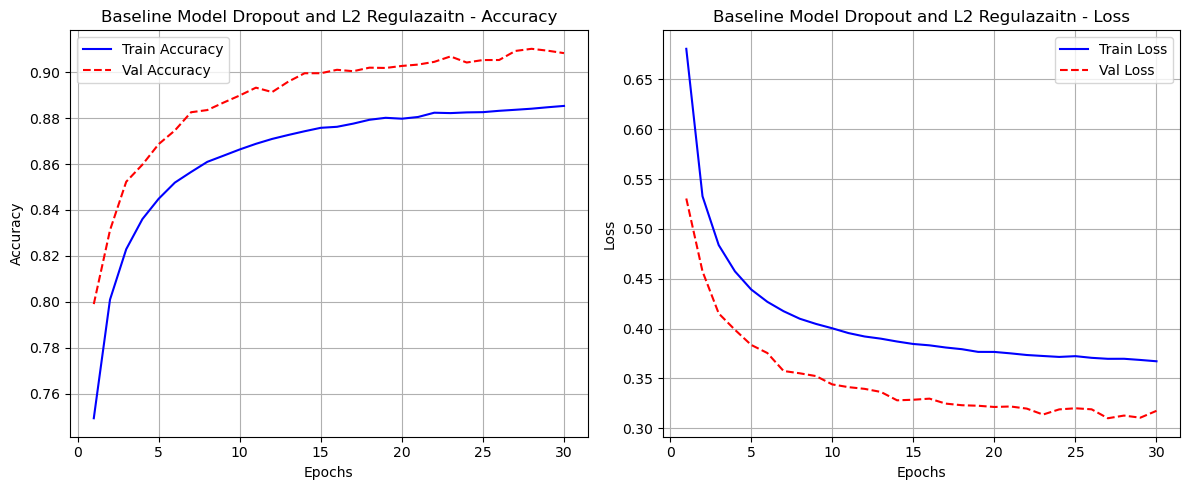

In [ ]:
plot_learning_curves(history_baseline_Dropout_L2_Batch, title='Baseline Model Dropout and L2 Regulazaitn')

In [ ]:
loss1, acc1 = baseline_model_Dropout_L2_Batch.evaluate(X_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9064 - loss: 0.3157
Test accuracy : 90.73%
Test loss     : 31.56%


The model has a higher loss. for further testing we will not use dropout and l2regulaization. because this is not good for our dataset.

# 3.3 OPTIMIZER AND LEARNING RATE STRATEGY

Try multiple optimizers (e.g., Adam, RMSprop, SGD with momentum).

*  SGD

SGD with different learning rates

In [ ]:
# Define function to train model with a given learning rate
def train_with_lr(lr):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),

        Dense(512),
        BatchNormalization(),
        LeakyReLU(alpha=0.01),

        Dense(256),
        BatchNormalization(),
        LeakyReLU(alpha=0.01),

        Dense(128),
        BatchNormalization(),
        LeakyReLU(alpha=0.01),

        Dense(64),
        BatchNormalization(),
        LeakyReLU(alpha=0.01),

        Dense(32),
        BatchNormalization(),
        LeakyReLU(alpha=0.01),

        Dense(7, activation='softmax')
    ])

    model.compile(optimizer=SGD(learning_rate=lr),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=30,
                                      batch_size=256,
                                      verbose=0)

    return model, history

# learning_rates = [0.0001, 0.001, 0.01, 0.1, 1.0]
learning_rates = [0.1,0.5, 1.0,1.5]
histories = []
models = []

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    model, history = train_with_lr(lr)
    histories.append((lr, history))
    models.append((lr, model))

    final_train_acc = history.history['accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_val_loss = history.history['val_loss'][-1]

    print(f"Final Training Accuracy: {final_train_acc:.4f}")
    print(f"Final Training Loss: {final_train_loss:.4f}")
    print(f"Final Validation Accuracy: {final_val_acc:.4f}")
    print(f"Final Validation Loss: {final_val_loss:.4f}")


Training with learning rate: 0.1
Final Training Accuracy: 0.9354
Final Training Loss: 0.1586
Final Validation Accuracy: 0.9400
Final Validation Loss: 0.1555

Training with learning rate: 0.5
Final Training Accuracy: 0.9383
Final Training Loss: 0.1512
Final Validation Accuracy: 0.9406
Final Validation Loss: 0.1526

Training with learning rate: 1.0
Final Training Accuracy: 0.9383
Final Training Loss: 0.1516
Final Validation Accuracy: 0.9396
Final Validation Loss: 0.1501

Training with learning rate: 1.5
Final Training Accuracy: 0.9371
Final Training Loss: 0.1527
Final Validation Accuracy: 0.9374
Final Validation Loss: 0.1560


SGD with best learning rate

In [ ]:
baseline_model_Batch_Norm_SGD = Sequential([
    Input(shape=(X_train.shape[1],)),

    Dense(512),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(256),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(128),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(64),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(32),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(7, activation='softmax')
])

baseline_model_Batch_Norm_SGD.summary()

baseline_model_Batch_Norm_SGD.compile(optimizer=SGD(learning_rate=0.5),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

history_baseline_Batch_Norm_SGD = baseline_model_Batch_Norm_SGD.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=30,
                                      batch_size=256,
                                      verbose=1)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_71 (Dense)                │ (None, 512)            │        28,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_44 (LeakyReLU)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_45 (LeakyReLU)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_46 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_47 (LeakyReLU)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_48 (LeakyReLU)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,919 (808.28 KB)

 Trainable params: 204,935 (800.53 KB)

 Non-trainable params: 1,984 (7.75 KB)

Epoch 1/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7512 - loss: 0.5919 - val_accuracy: 0.8238 - val_loss: 0.4186
Epoch 2/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8371 - loss: 0.3876 - val_accuracy: 0.8554 - val_loss: 0.3536
Epoch 3/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8607 - loss: 0.3334 - val_accuracy: 0.8742 - val_loss: 0.3074
Epoch 4/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8770 - loss: 0.2991 - val_accuracy: 0.8803 - val_loss: 0.2979
Epoch 5/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8861 - loss: 0.2731 - val_accuracy: 0.8938 - val_loss: 0.2605
Epoch 6/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8941 - loss: 0.2564 - val_accuracy: 0.8994 - val_loss: 0.2453
Epoch 7/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9009 - loss: 0.2413 - val_accuracy: 0.9023 - val_loss: 0.2400
Epoch 8/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9053 - loss: 0

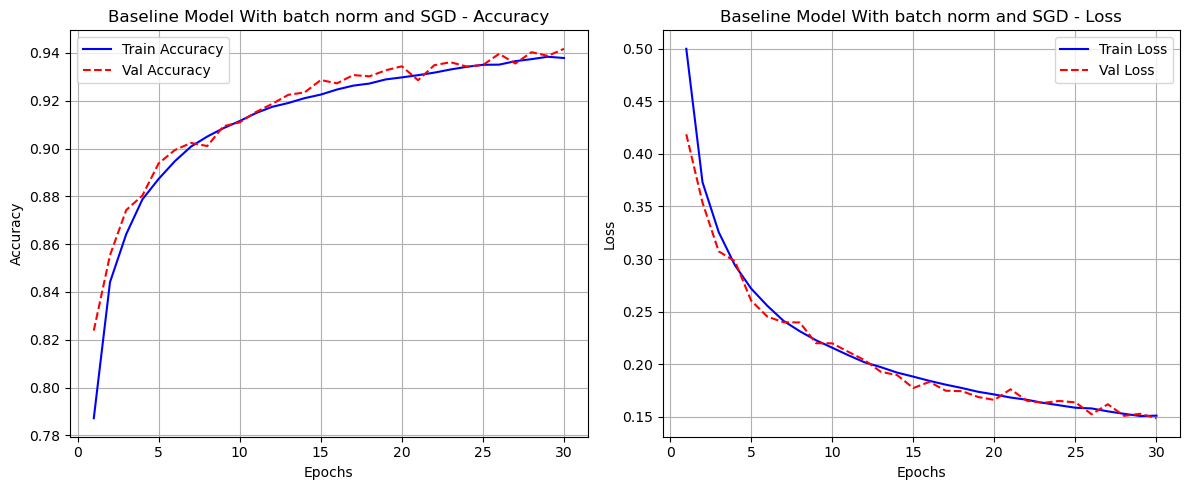

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9409 - loss: 0.1495
Test accuracy : 93.99%
Test loss     : 15.23%


In [ ]:
plot_learning_curves(history_baseline_Batch_Norm_SGD, title='Baseline Model With batch norm and SGD')

loss1, acc1 = baseline_model_Batch_Norm_SGD.evaluate(X_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

Now lets try momentum with SGD +  Batch normalization

In [ ]:
# Function to train the model with a given momentum value
def train_with_momentum(momentum):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),

        Dense(512),
        BatchNormalization(),
        LeakyReLU(alpha=0.01),

        Dense(256),
        BatchNormalization(),
        LeakyReLU(alpha=0.01),

        Dense(128),
        BatchNormalization(),
        LeakyReLU(alpha=0.01),

        Dense(64),
        BatchNormalization(),
        LeakyReLU(alpha=0.01),

        Dense(32),
        BatchNormalization(),
        LeakyReLU(alpha=0.01),

        Dense(7, activation='softmax')
    ])

    optimizer = SGD(learning_rate=0.5, momentum=momentum)

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train,
                        validation_split=0.2,
                        epochs=30,
                        batch_size=256,
                        verbose=0)

    return model, history

# Test different momentum values
momentum_values = [0.2,0.3,0.4,0.7, 0.9]
histories = []
models = []

for momentum in momentum_values:
    print(f"\nTraining with momentum: {momentum}")
    model, history = train_with_momentum(momentum)
    histories.append((momentum, history))
    models.append((momentum, model))

    final_train_acc = history.history['accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_val_loss = history.history['val_loss'][-1]

    print(f"Final Training Accuracy: {final_train_acc:.4f}")
    print(f"Final Training Loss: {final_train_loss:.4f}")
    print(f"Final Validation Accuracy: {final_val_acc:.4f}")
    print(f"Final Validation Loss: {final_val_loss:.4f}")


Training with momentum: 0.2
Final Training Accuracy: 0.9396
Final Training Loss: 0.1483
Final Validation Accuracy: 0.9394
Final Validation Loss: 0.1541

Training with momentum: 0.3
Final Training Accuracy: 0.9392
Final Training Loss: 0.1486
Final Validation Accuracy: 0.9394
Final Validation Loss: 0.1534

Training with momentum: 0.4
Final Training Accuracy: 0.9382
Final Training Loss: 0.1500
Final Validation Accuracy: 0.9402
Final Validation Loss: 0.1503

Training with momentum: 0.7
Final Training Accuracy: 0.9369
Final Training Loss: 0.1539
Final Validation Accuracy: 0.9399
Final Validation Loss: 0.1521

Training with momentum: 0.9
Final Training Accuracy: 0.9336
Final Training Loss: 0.1611
Final Validation Accuracy: 0.9371
Final Validation Loss: 0.1579


SGD with best learning rate and Best Momentum


In [ ]:
baseline_model_Batch_Norm_SGD_Momentum = Sequential([
    Input(shape=(X_train.shape[1],)),

    Dense(512),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(256),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(128),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(64),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(32),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(7, activation='softmax')
])

baseline_model_Batch_Norm_SGD_Momentum.summary()

baseline_model_Batch_Norm_SGD_Momentum.compile(optimizer=SGD(learning_rate=0.5, momentum=0.2),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

history_baseline_Batch_Norm_SGD_Momentum = baseline_model_Batch_Norm_SGD_Momentum.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=30,
                                      batch_size=256,
                                      verbose=1)

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_107 (Dense)               │ (None, 512)            │        28,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_70          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_74 (LeakyReLU)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_108 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_71          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_75 (LeakyReLU)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_72          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_76 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_110 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_73          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_77 (LeakyReLU)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_111 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_74          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_78 (LeakyReLU)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,919 (808.28 KB)

 Trainable params: 204,935 (800.53 KB)

 Non-trainable params: 1,984 (7.75 KB)

Epoch 1/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7541 - loss: 0.5824 - val_accuracy: 0.8171 - val_loss: 0.4397
Epoch 2/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8385 - loss: 0.3854 - val_accuracy: 0.8555 - val_loss: 0.3507
Epoch 3/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8645 - loss: 0.3279 - val_accuracy: 0.8651 - val_loss: 0.3222
Epoch 4/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8789 - loss: 0.2935 - val_accuracy: 0.8804 - val_loss: 0.2935
Epoch 5/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8874 - loss: 0.2728 - val_accuracy: 0.8976 - val_loss: 0.2524
Epoch 6/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8952 - loss: 0.2549 - val_accuracy: 0.8965 - val_loss: 0.2500
Epoch 7/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9013 - loss: 0.2404 - val_accuracy: 0.9106 - val_loss: 0.2197
Epoch 8/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9057 - loss: 0

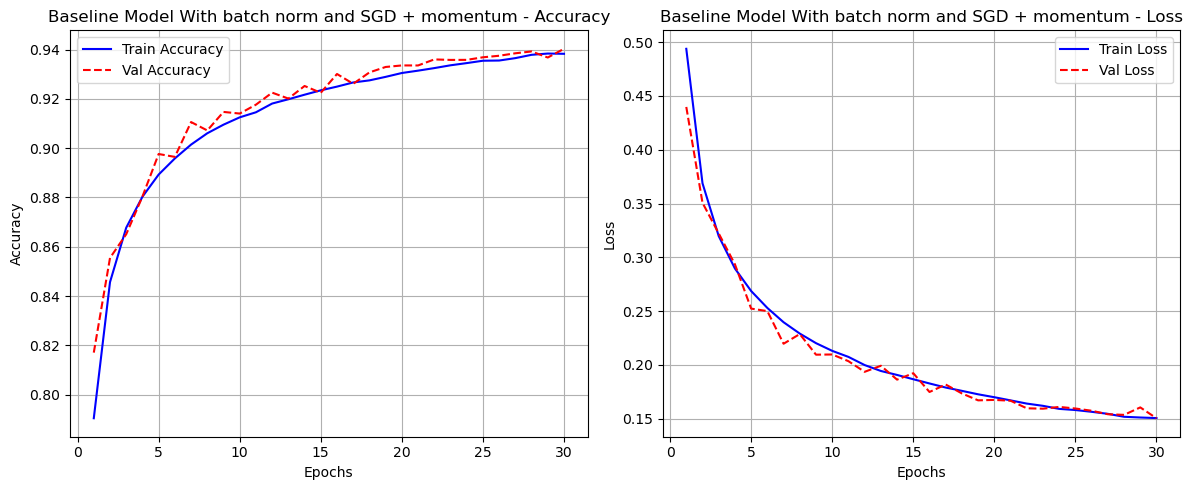

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9401 - loss: 0.1488
Test accuracy : 93.97%
Test loss     : 15.06%


In [ ]:
plot_learning_curves(history_baseline_Batch_Norm_SGD_Momentum, title='Baseline Model With batch norm and SGD + momentum')

loss1, acc1 = baseline_model_Batch_Norm_SGD_Momentum.evaluate(X_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

Try different learning rates for Adam


In [ ]:
# Define function to train model with a given learning rate
def train_Adam_with_lr(lr):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),

        Dense(512),
        BatchNormalization(),
        LeakyReLU(alpha=0.01),

        Dense(256),
        BatchNormalization(),
        LeakyReLU(alpha=0.01),

        Dense(128),
        BatchNormalization(),
        LeakyReLU(alpha=0.01),

        Dense(64),
        BatchNormalization(),
        LeakyReLU(alpha=0.01),

        Dense(32),
        BatchNormalization(),
        LeakyReLU(alpha=0.01),

        Dense(7, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=lr),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=30,
                                      batch_size=256,
                                      verbose=0)

    return model, history

learning_rates = [0.0001, 0.001, 0.01, 0.1, 1.0]
histories = []
models = []

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    model, history = train_Adam_with_lr(lr)
    histories.append((lr, history))
    models.append((lr, model))

    final_train_acc = history.history['accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_val_loss = history.history['val_loss'][-1]

    print(f"Final Training Accuracy: {final_train_acc:.4f}")
    print(f"Final Training Loss: {final_train_loss:.4f}")
    print(f"Final Validation Accuracy: {final_val_acc:.4f}")
    print(f"Final Validation Loss: {final_val_loss:.4f}")


Training with learning rate: 0.0001
Final Training Accuracy: 0.9218
Final Training Loss: 0.1920
Final Validation Accuracy: 0.9293
Final Validation Loss: 0.1785

Training with learning rate: 0.001
Final Training Accuracy: 0.9405
Final Training Loss: 0.1461
Final Validation Accuracy: 0.9427
Final Validation Loss: 0.1451

Training with learning rate: 0.01
Final Training Accuracy: 0.9377
Final Training Loss: 0.1508
Final Validation Accuracy: 0.9411
Final Validation Loss: 0.1457

Training with learning rate: 0.1
Final Training Accuracy: 0.9236
Final Training Loss: 0.1893
Final Validation Accuracy: 0.9296
Final Validation Loss: 0.1767

Training with learning rate: 1.0
Final Training Accuracy: 0.8149
Final Training Loss: 0.6201
Final Validation Accuracy: 0.8180
Final Validation Loss: 0.4712


Adam with best learning rate

In [ ]:
baseline_model_Batch_Norm_Adam = Sequential([
    Input(shape=(X_train.shape[1],)),

    Dense(512),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(256),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(128),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(64),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(32),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(7, activation='softmax')
])

baseline_model_Batch_Norm_Adam.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_143 (Dense)               │ (None, 512)            │        28,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_100         │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_104 (LeakyReLU)     │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_144 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_101         │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_105 (LeakyReLU)     │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_145 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_102         │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_106 (LeakyReLU)     │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_146 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_103         │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_107 (LeakyReLU)     │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_147 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_104         │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_108 (LeakyReLU)     │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_148 (Dense)               │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,919 (808.28 KB)

 Trainable params: 204,935 (800.53 KB)

 Non-trainable params: 1,984 (7.75 KB)

In [ ]:
baseline_model_Batch_Norm_Adam.compile(optimizer=Adam(learning_rate=0.001),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

In [ ]:
history_baseline_model_Batch_Norm_Adam = baseline_model_Batch_Norm_Adam.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=30,
                                      batch_size=256,
                                      verbose=1)

Epoch 1/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7427 - loss: 0.6705 - val_accuracy: 0.8366 - val_loss: 0.3958
Epoch 2/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8418 - loss: 0.3808 - val_accuracy: 0.8641 - val_loss: 0.3304
Epoch 3/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8697 - loss: 0.3169 - val_accuracy: 0.8837 - val_loss: 0.2843
Epoch 4/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8833 - loss: 0.2833 - val_accuracy: 0.8972 - val_loss: 0.2545
Epoch 5/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8923 - loss: 0.2609 - val_accuracy: 0.9020 - val_loss: 0.2420
Epoch 6/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9007 - loss: 0.2428 - val_accuracy: 0.9085 - val_loss: 0.2258
Epoch 7/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9060 - loss: 0.2289 - val_accuracy: 0.9130 - val_loss: 0.2163
Epoch 8/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9099 - loss: 0

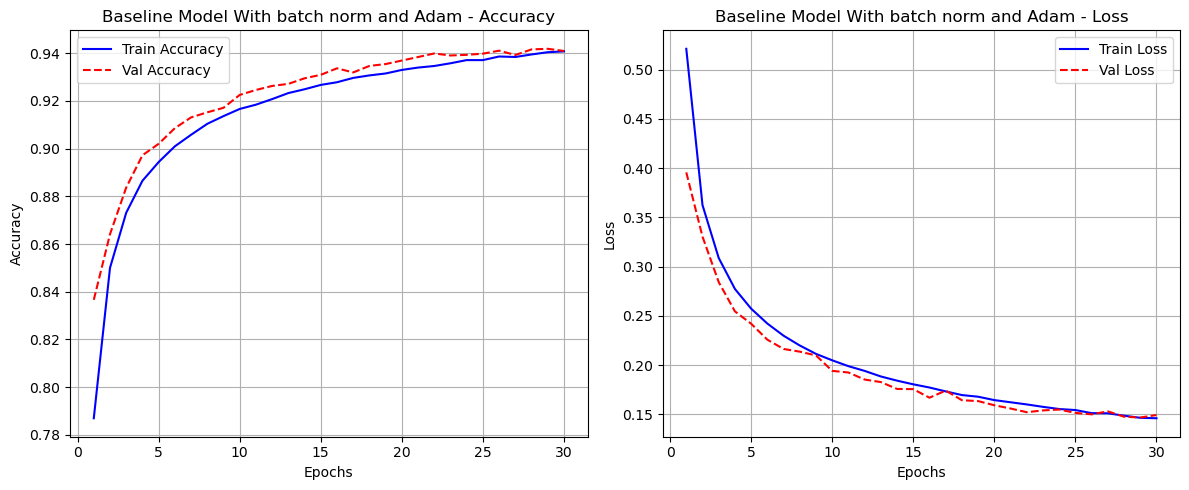

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9413 - loss: 0.1485
Test accuracy : 94.12%
Test loss     : 14.86%


In [ ]:
plot_learning_curves(history_baseline_model_Batch_Norm_Adam, title='Baseline Model With batch norm and Adam')

loss1, acc1 = baseline_model_Batch_Norm_Adam.evaluate(X_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

So Adam performs best we will use this model for further experiments


* Use learning rate scheduling strategies like ReduceLROnPlateau.


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6)

In [ ]:
baseline_model_Batch_Norm_Adam_callbacks = Sequential([
    Input(shape=(X_train.shape[1],)),

    Dense(512),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(256),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(128),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(64),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(32),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(7, activation='softmax')
])

baseline_model_Batch_Norm_Adam_callbacks.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_149 (Dense)               │ (None, 512)            │        28,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_105         │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_109 (LeakyReLU)     │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_150 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_106         │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_110 (LeakyReLU)     │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_151 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_107         │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_111 (LeakyReLU)     │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_108         │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_112 (LeakyReLU)     │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_109         │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_113 (LeakyReLU)     │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,919 (808.28 KB)

 Trainable params: 204,935 (800.53 KB)

 Non-trainable params: 1,984 (7.75 KB)

In [ ]:
baseline_model_Batch_Norm_Adam_callbacks.compile(optimizer=Adam(learning_rate=0.001),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

In [ ]:
history_baseline_model_Batch_Norm_Adam_callbacks = baseline_model_Batch_Norm_Adam_callbacks.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=30,
                                      batch_size=256,
                                      callbacks=[reduce_lr],
                                      verbose=1)

Epoch 1/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7437 - loss: 0.6962 - val_accuracy: 0.8330 - val_loss: 0.4011 - learning_rate: 0.0010
Epoch 2/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8419 - loss: 0.3785 - val_accuracy: 0.8653 - val_loss: 0.3292 - learning_rate: 0.0010
Epoch 3/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8694 - loss: 0.3163 - val_accuracy: 0.8837 - val_loss: 0.2860 - learning_rate: 0.0010
Epoch 4/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8851 - loss: 0.2802 - val_accuracy: 0.8967 - val_loss: 0.2543 - learning_rate: 0.0010
Epoch 5/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8944 - loss: 0.2589 - val_accuracy: 0.9023 - val_loss: 0.2417 - learning_rate: 0.0010
Epoch 6/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9012 - loss: 0.2409 - val_accuracy: 0.9088 - val_loss: 0.2267 - learning_rate: 0.0010
Epoch 7/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9

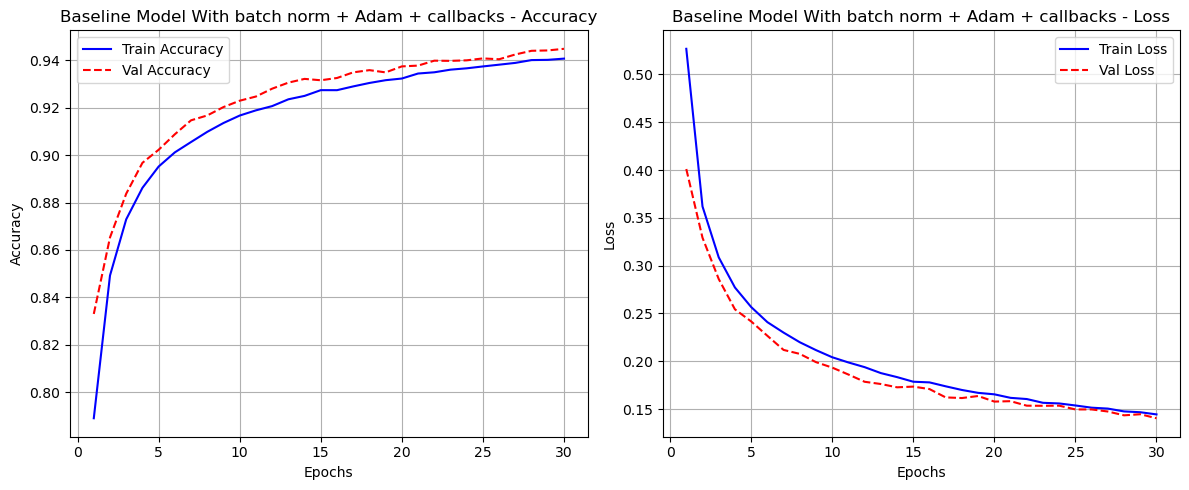

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9455 - loss: 0.1389
Test accuracy : 94.45%
Test loss     : 14.10%


In [ ]:
plot_learning_curves(history_baseline_model_Batch_Norm_Adam_callbacks, title='Baseline Model With batch norm + Adam + callbacks')

loss1, acc1 = baseline_model_Batch_Norm_Adam_callbacks.evaluate(X_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

# 3.4 TRAINING MANAGEMENT

* Integrate EarlyStopping to halt training when validation performance stops improving.
* Log training and validation performance per epoch.

In [ ]:
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6)

In [ ]:
baseline_model_Batch_Norm_Adam_callbacks_moreEpochs = Sequential([
    Input(shape=(X_train.shape[1],)),

    Dense(512),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(256),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(128),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(64),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(32),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(7, activation='softmax')
])

baseline_model_Batch_Norm_Adam_callbacks_moreEpochs.summary()

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_155 (Dense)               │ (None, 512)            │        28,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_110         │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_114 (LeakyReLU)     │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_156 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_111         │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_115 (LeakyReLU)     │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_157 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_112         │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_116 (LeakyReLU)     │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_158 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_113         │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_117 (LeakyReLU)     │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_159 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_114         │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_118 (LeakyReLU)     │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_160 (Dense)               │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,919 (808.28 KB)

 Trainable params: 204,935 (800.53 KB)

 Non-trainable params: 1,984 (7.75 KB)

In [ ]:
baseline_model_Batch_Norm_Adam_callbacks_moreEpochs.compile(optimizer=Adam(learning_rate=0.001),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

In [ ]:
history_baseline_model_Batch_Norm_Adam_callbacks_moreEpochs = baseline_model_Batch_Norm_Adam_callbacks_moreEpochs.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=100,
                                      batch_size=256,
                                      callbacks=[reduce_lr, checkpoint, early_stop],
                                      verbose=1)

Epoch 1/100
1450/1453 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7342 - loss: 0.7153
Epoch 1: val_loss improved from inf to 0.40226, saving model to best_model.keras
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7344 - loss: 0.7148 - val_accuracy: 0.8340 - val_loss: 0.4023 - learning_rate: 0.0010
Epoch 2/100
1450/1453 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8422 - loss: 0.3806
Epoch 2: val_loss improved from 0.40226 to 0.33504, saving model to best_model.keras
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8422 - loss: 0.3806 - val_accuracy: 0.8620 - val_loss: 0.3350 - learning_rate: 0.0010
Epoch 3/100
1448/1453 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8678 - loss: 0.3200
Epoch 3: val_loss improved from 0.33504 to 0.27986, saving model to best_model.keras
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8678 - loss: 0.3200 - val_accuracy: 0.8878 - val_loss: 0.2799 - learning_rate: 0.0010
Epoch 4/100
1447/1453 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/

* Visualize training curves (accuracy and loss).

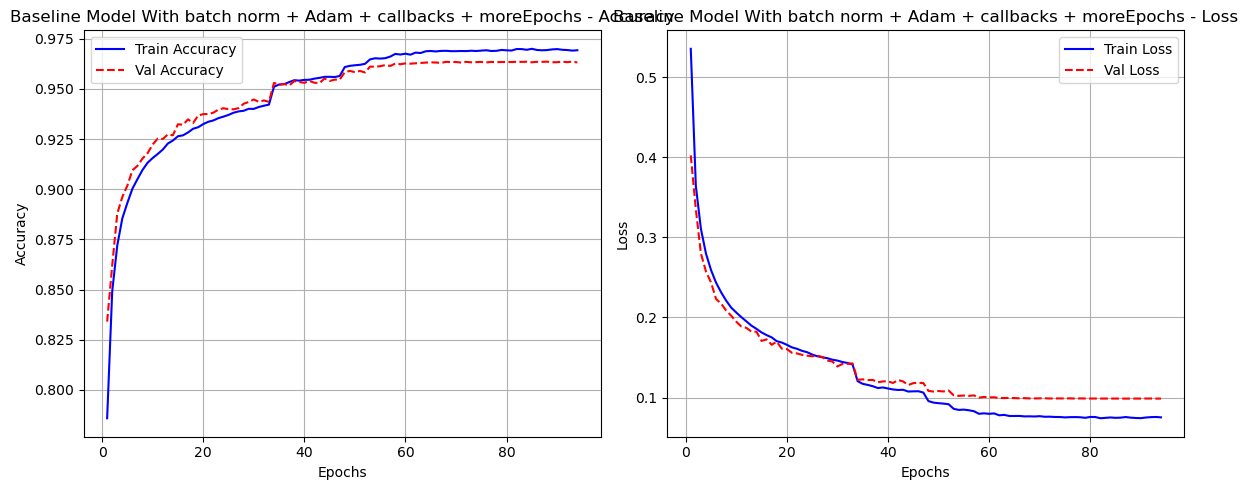

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9636 - loss: 0.0972
Test accuracy : 96.34%
Test loss     : 9.77%


In [ ]:
plot_learning_curves(history_baseline_model_Batch_Norm_Adam_callbacks_moreEpochs, title='Baseline Model With batch norm + Adam + callbacks + moreEpochs')

loss1, acc1 = baseline_model_Batch_Norm_Adam_callbacks_moreEpochs.evaluate(X_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

Just a practice
Apply regularization to reduce overfitting

In [ ]:
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6)

In [ ]:
baseline_model_Batch_Norm_Adam_callbacks_moreEpochs_Regularization = Sequential([
    Input(shape=(X_train.shape[1],)),

    Dense(512, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.1),

    Dense(256, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.1),

    Dense(128, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.1),

    Dense(64, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.1),

    Dense(32, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.1),

    Dense(7, activation='softmax')
])

baseline_model_Batch_Norm_Adam_callbacks_moreEpochs_Regularization.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_161 (Dense)               │ (None, 512)            │        28,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_115         │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_119 (LeakyReLU)     │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_162 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_116         │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_120 (LeakyReLU)     │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_163 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_117         │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_121 (LeakyReLU)     │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_164 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_118         │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_122 (LeakyReLU)     │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_165 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_119         │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_123 (LeakyReLU)     │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_166 (Dense)               │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,919 (808.28 KB)

 Trainable params: 204,935 (800.53 KB)

 Non-trainable params: 1,984 (7.75 KB)

In [ ]:
baseline_model_Batch_Norm_Adam_callbacks_moreEpochs_Regularization.compile(optimizer=Adam(learning_rate=0.001),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

In [ ]:
history_baseline_model_Batch_Norm_Adam_callbacks_moreEpochs_Regularization = baseline_model_Batch_Norm_Adam_callbacks_moreEpochs_Regularization.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=100,
                                      batch_size=256,
                                      callbacks=[reduce_lr, checkpoint, early_stop],
                                      verbose=1)

Epoch 1/100
1447/1453 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7057 - loss: 0.8544
Epoch 1: val_loss improved from inf to 0.52726, saving model to best_model.keras
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.7059 - loss: 0.8536 - val_accuracy: 0.8056 - val_loss: 0.5273 - learning_rate: 0.0010
Epoch 2/100
1449/1453 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7959 - loss: 0.5463
Epoch 2: val_loss improved from 0.52726 to 0.45267, saving model to best_model.keras
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7960 - loss: 0.5462 - val_accuracy: 0.8372 - val_loss: 0.4527 - learning_rate: 0.0010
Epoch 3/100
1449/1453 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8195 - loss: 0.4910
Epoch 3: val_loss improved from 0.45267 to 0.42517, saving model to best_model.keras
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8195 - loss: 0.4910 - val_accuracy: 0.8466 - val_loss: 0.4252 - learning_rate: 0.0010
Epoch 4/100
1451/1453 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/

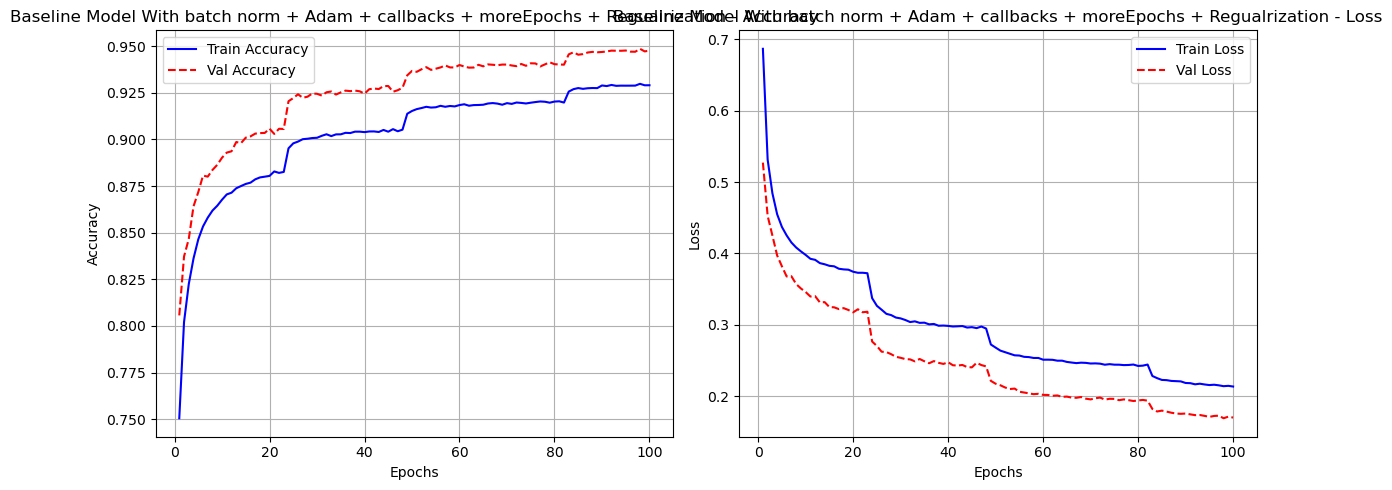

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9473 - loss: 0.1690
Test accuracy : 94.75%
Test loss     : 16.99%


In [ ]:
plot_learning_curves(history_baseline_model_Batch_Norm_Adam_callbacks_moreEpochs_Regularization, title='Baseline Model With batch norm + Adam + callbacks + moreEpochs + Regualrization')

loss1, acc1 = baseline_model_Batch_Norm_Adam_callbacks_moreEpochs_Regularization.evaluate(X_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

# 3.5 MODEL EVALUATION

* Accuracy
* Precision, Recall, and F1-score (both macro and weighted)

In [ ]:
models_dict = {
    "Baseline": baseline_model,
    "More Layers": baseline_model_more_layers,
    "LeakyReLU": baseline_model_LeakyReLU,
    "BatchNorm": baseline_model_Batch_Norm,
    "Dropout": baseline_model_DropOut,
    "L2 Regularized": baseline_model_L2_Reg,
    "Dropout + L2 + BatchNorm": baseline_model_Dropout_L2_Batch,
    "BatchNorm + SGD": baseline_model_Batch_Norm_SGD,
    "BatchNorm + Adam": baseline_model_Batch_Norm_Adam,
    "BatchNorm + Adam + callbacks": baseline_model_Batch_Norm_Adam_callbacks,
    "BatchNorm + Adam + callbacks + MoreEpochs": baseline_model_Batch_Norm_Adam_callbacks_moreEpochs,
    "BatchNorm + Adam + callbacks + MoreEpochs + Regularization": baseline_model_Batch_Norm_Adam_callbacks_moreEpochs_Regularization
}
histories = {
    "Baseline": history_baseline,
    "More Layers": history_baseline_more_layers,
    "LeakyReLU": history_baseline_LeakyReLU,
    "BatchNorm": history_baseline_Batch_Norm,
    "Dropout": history_baseline_DropOut,
    "L2 Regularized": history_baseline_L2_Reg,
    "Dropout + L2 + BatchNorm": history_baseline_Dropout_L2_Batch,
    "BatchNorm + SGD": history_baseline_Batch_Norm_SGD,
    "BatchNorm + Adam": history_baseline_model_Batch_Norm_Adam,
    "BatchNorm + Adam + callbacks": history_baseline_model_Batch_Norm_Adam_callbacks,
    "BatchNorm + Adam + callbacks + MoreEpochs": history_baseline_model_Batch_Norm_Adam_callbacks_moreEpochs,
    "BatchNorm + Adam + callbacks + MoreEpochs + Regularization": history_baseline_model_Batch_Norm_Adam_callbacks_moreEpochs_Regularization
}

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
results = []

for name, model in models_dict.items():
    history = histories[name]
    num_epochs = len(history.epoch)

    # Evaluate accuracy & loss
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    # Predict and calculate metrics
    y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    # 4. Print classification report
    print("\nModel:"+name+"\n")
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred, zero_division=0))
    # Get last training and validation accuracy from history
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]

    # Determine overfitting and underfitting (you can adjust these thresholds)
    overfitting = (train_acc - val_acc) > 0.015
    underfitting = (train_acc < 0.85) and (val_acc < 0.85)

    # Append result
    results.append({
        'Model': name,
        'Epochs Trained': num_epochs,
        'Test Accuracy': test_acc,
        'Test Loss': test_loss,
        'Precision (Macro)': report['macro avg']['precision'],
        'Recall (Macro)': report['macro avg']['recall'],
        'F1-score (Macro)': report['macro avg']['f1-score'],
        'Precision (Weighted)': report['weighted avg']['precision'],
        'Recall (Weighted)': report['weighted avg']['recall'],
        'F1-score (Weighted)': report['weighted avg']['f1-score'],
        'Overfitting': overfitting,
        'Underfitting': underfitting
    })




Model:Baseline


Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     42368
           1       0.90      0.92      0.91     56661
           2       0.90      0.76      0.82      7151
           3       0.66      0.72      0.69       549
           4       0.67      0.70      0.68      1899
           5       0.65      0.86      0.74      3473
           6       0.91      0.86      0.89      4102

    accuracy                           0.88    116203
   macro avg       0.80      0.81      0.80    116203
weighted avg       0.89      0.88      0.89    116203


Model:More Layers


Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.88      0.90     42368
           1       0.90      0.93      0.91     56661
           2       0.89      0.82      0.85      7151
           3       0.75      0.58      0.66       549
           4       0.82      0.57      0.67  

In [ ]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Test Accuracy", ascending=False)
results_df


,Model,Epochs Trained,Test Accuracy,Test Loss,Precision (Macro),Recall (Macro),F1-score (Macro),Precision (Weighted),Recall (Weighted),F1-score (Weighted),Overfitting,Underfitting
10,BatchNorm + Adam + callbacks + MoreEpochs,94,0.963366,0.097679,0.937697,0.936323,0.936996,0.963363,0.963366,0.963360,False,False
11,BatchNorm + Adam + callbacks + MoreEpochs + Re...,100,0.947488,0.169879,0.917083,0.916935,0.916956,0.947465,0.947488,0.947456,False,False
9,BatchNorm + Adam + callbacks,30,0.944528,0.141015,0.907191,0.907672,0.907393,0.944563,0.944528,0.944540,False,False
8,BatchNorm + Adam,30,0.941172,0.148600,0.910228,0.896965,0.903231,0.941109,0.941172,0.941096,False,False
3,BatchNorm,30,0.940664,0.147184,0.893051,0.909998,0.900784,0.940954,0.940664,0.940703,False,False
7,BatchNorm + SGD,30,0.939924,0.152331,0.892155,0.910017,0.899940,0.940464,0.939924,0.939988,False,False
4,Dropout,30,0.925415,0.181342,0.883089,0.877561,0.878761,0.926271,0.925415,0.925300,False,False
2,LeakyReLU,30,0.908118,0.229848,0.860551,0.837770,0.847396,0.908573,0.908118,0.908094,False,False
6,Dropout + L2 + BatchNorm,30,0.907343,0.315570,0.856713,0.844424,0.848179,0.907318,0.907343,0.906794,False,False
1,More Layers,30,0.891879,0.283983,0.826747,0.781734,0.797677,0.894143,0.891879,0.891803,False,False


* Confusion Matrix for detailed error analysis

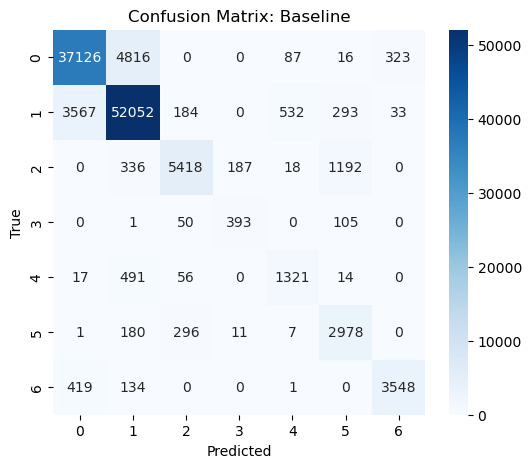

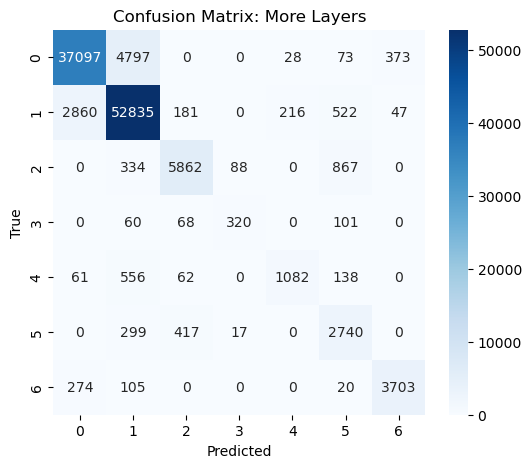

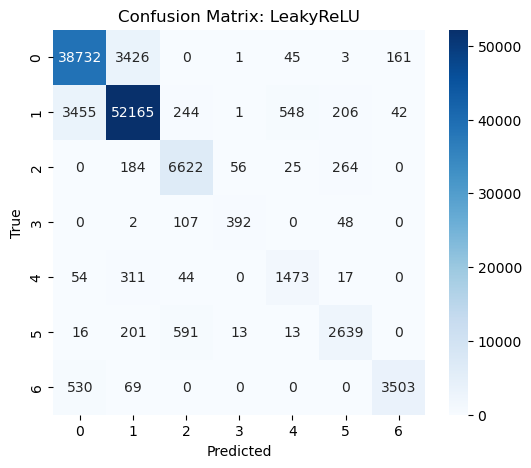

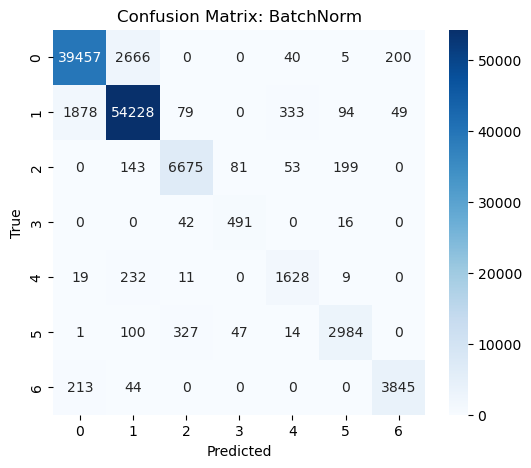

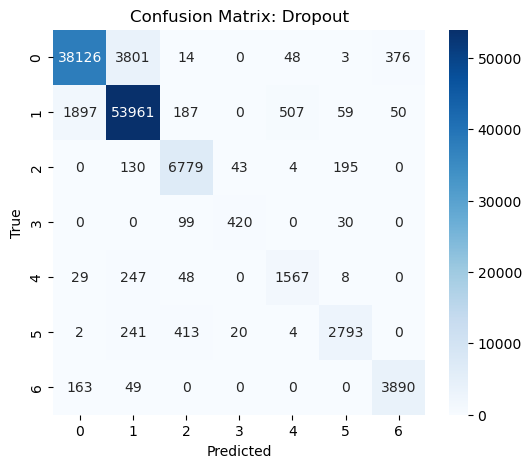

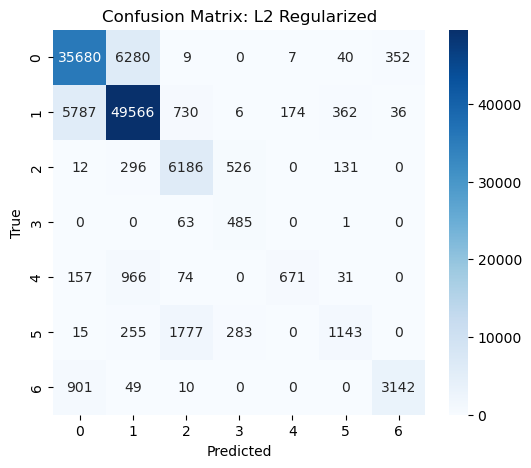

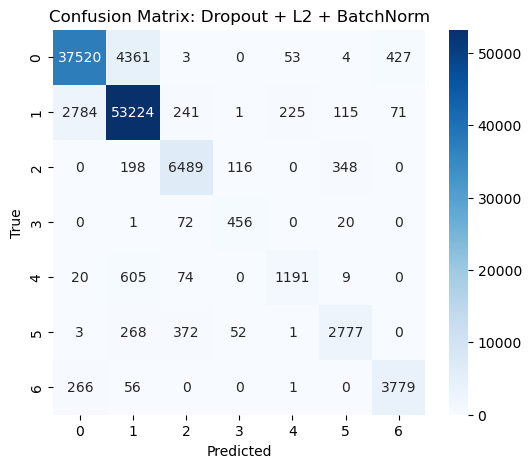

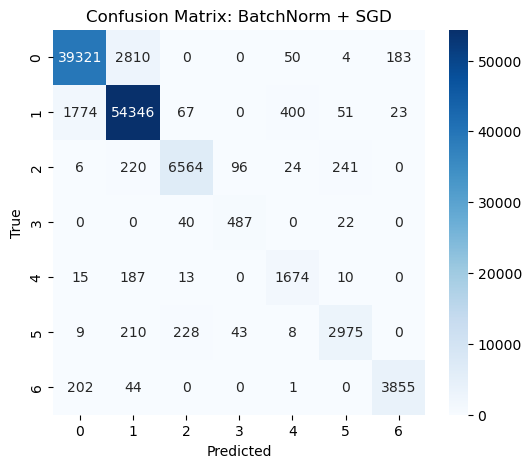

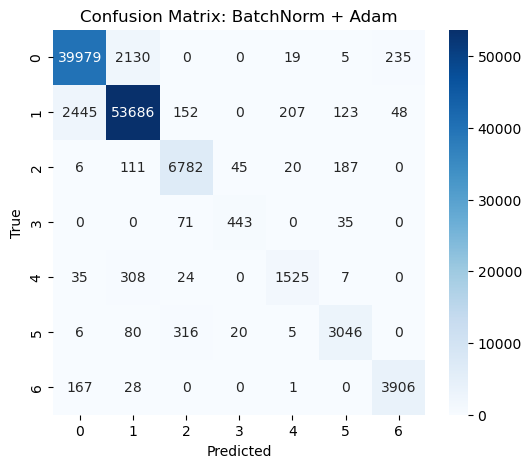

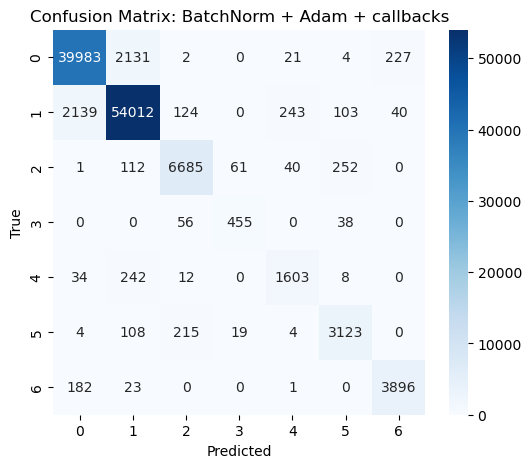

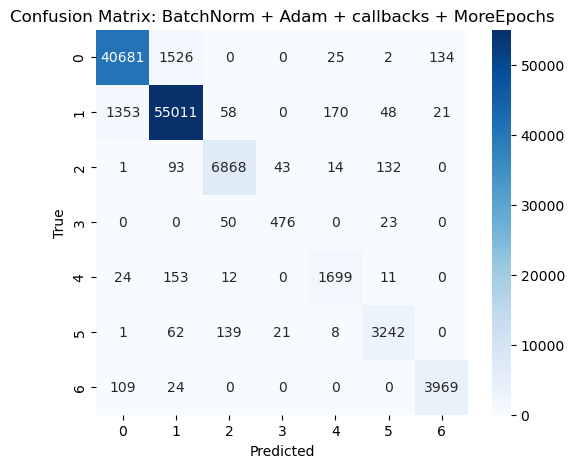

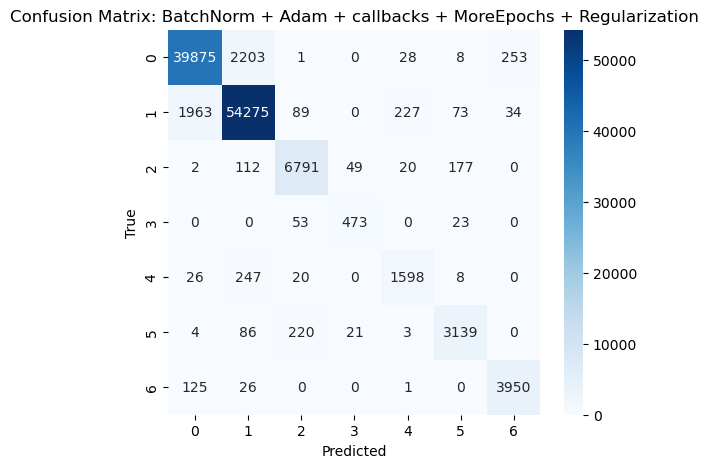

In [ ]:
for name, model in models_dict.items():
    y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


* Visualized learning curves for training and validation

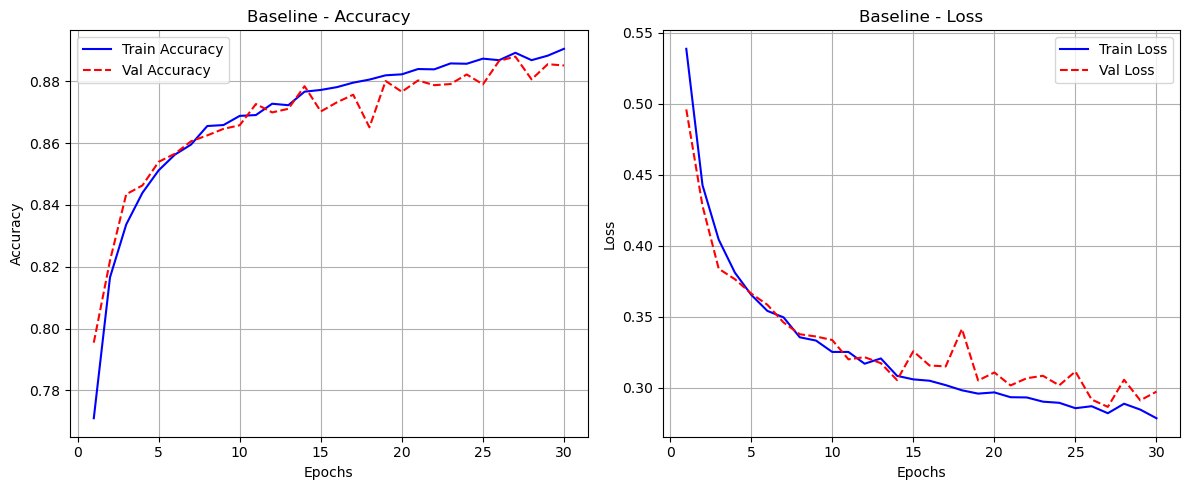

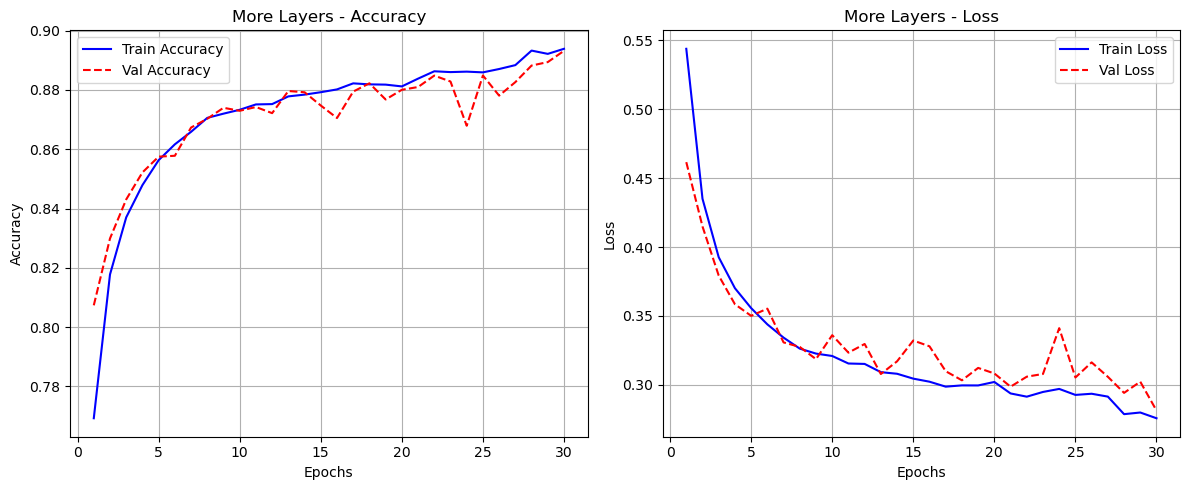

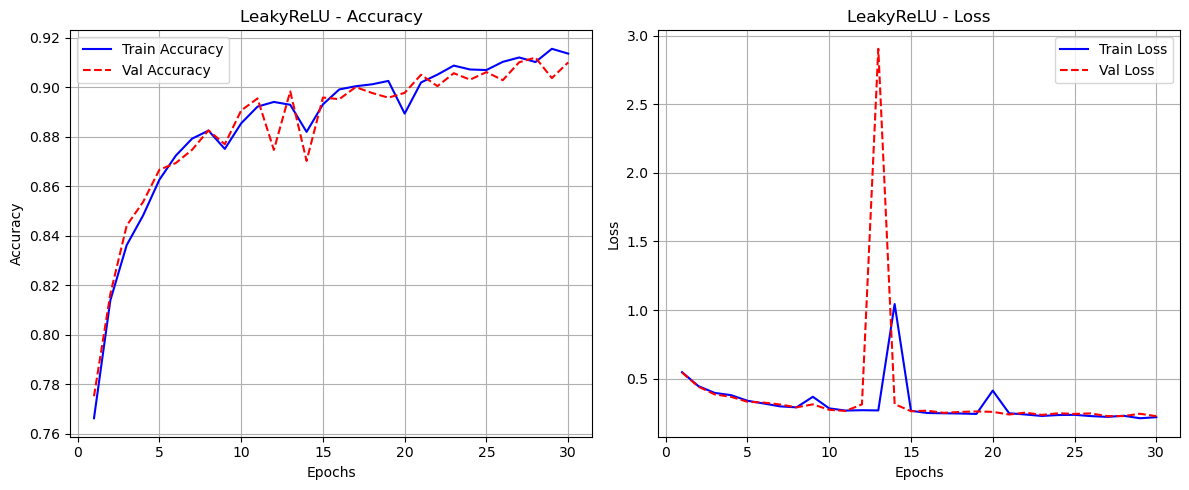

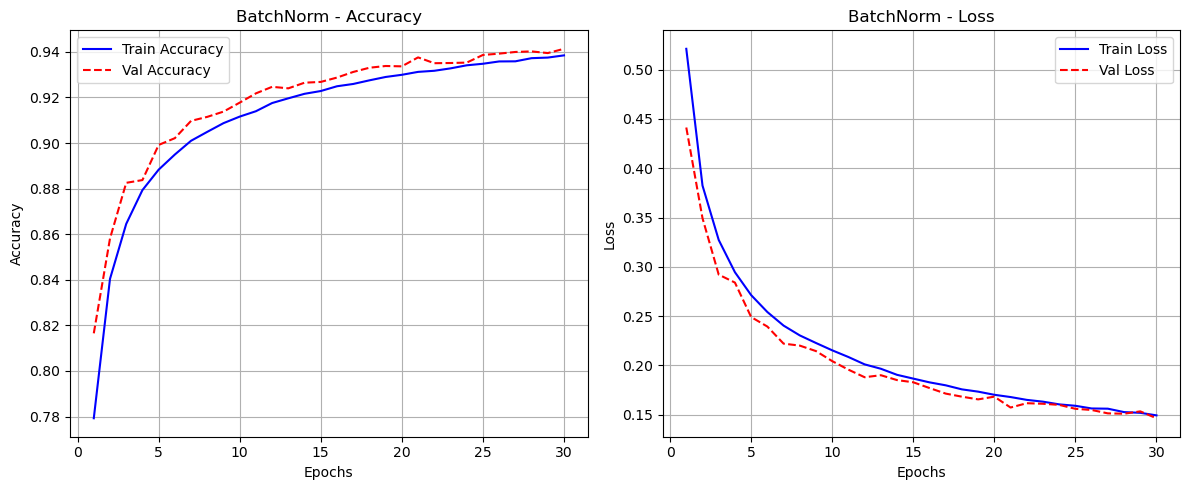

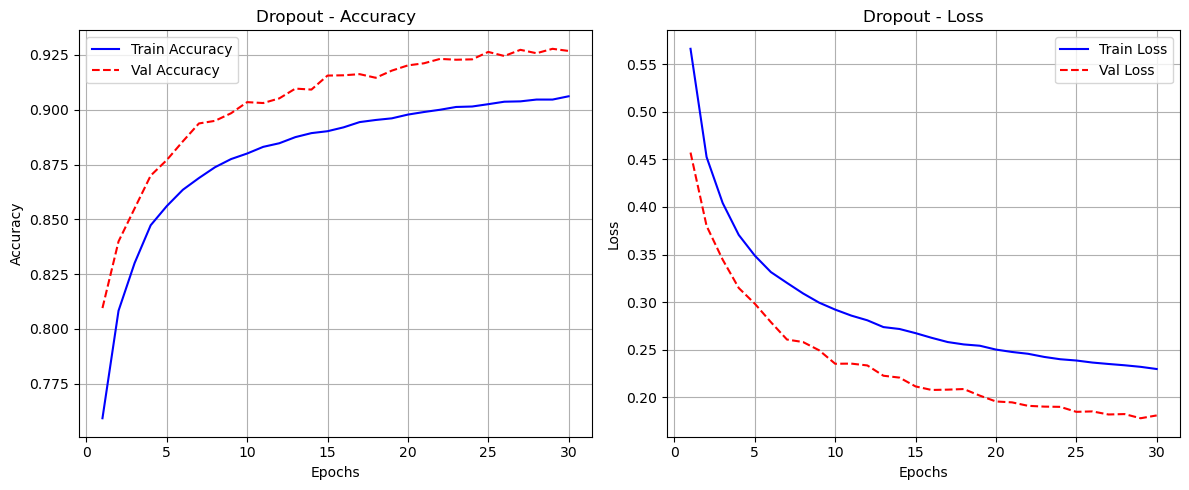

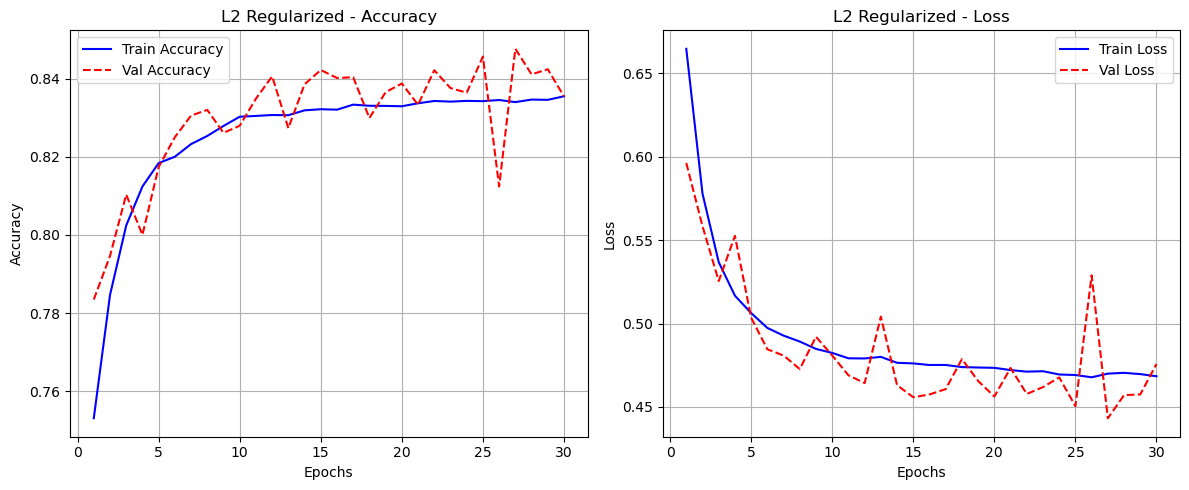

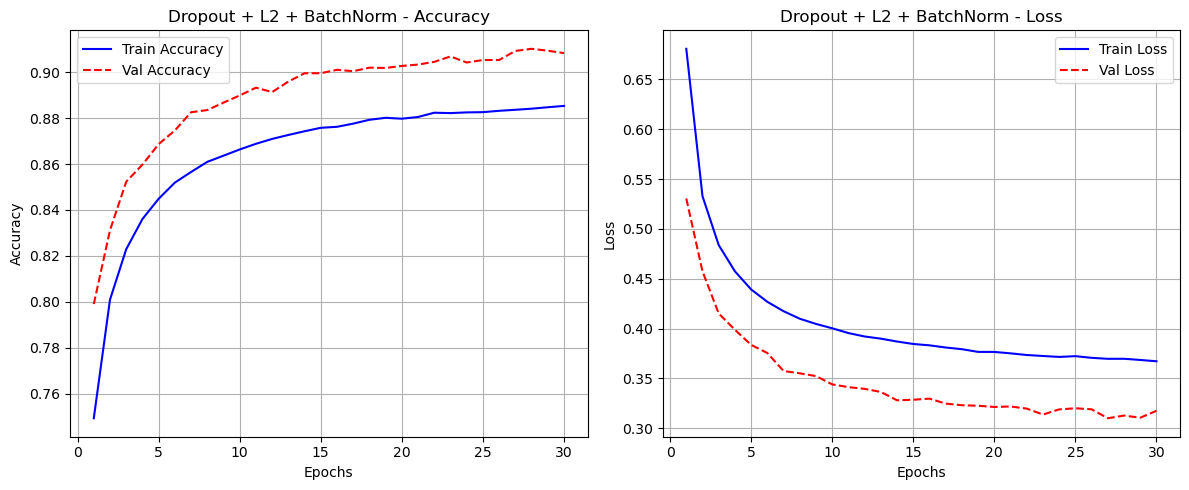

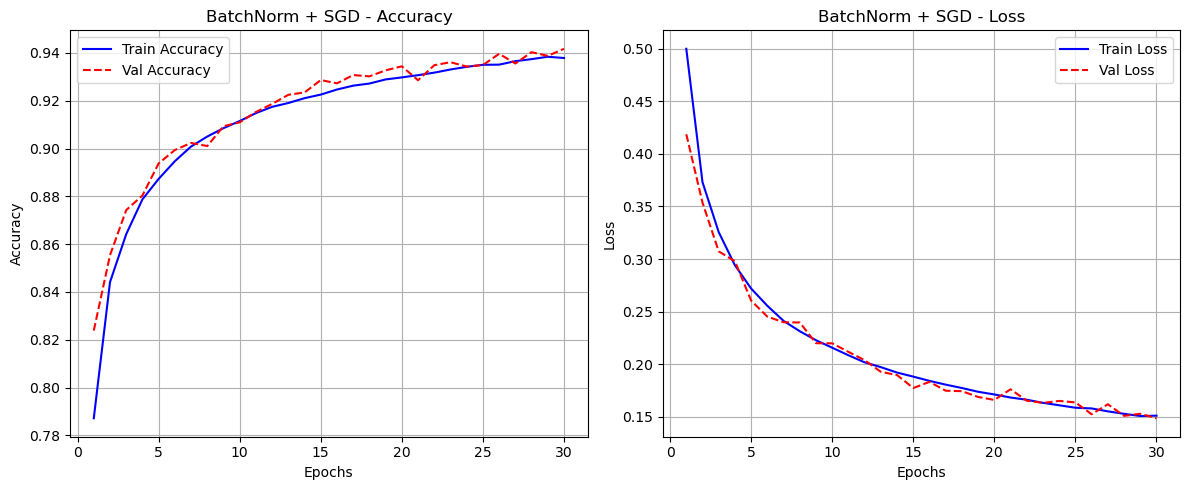

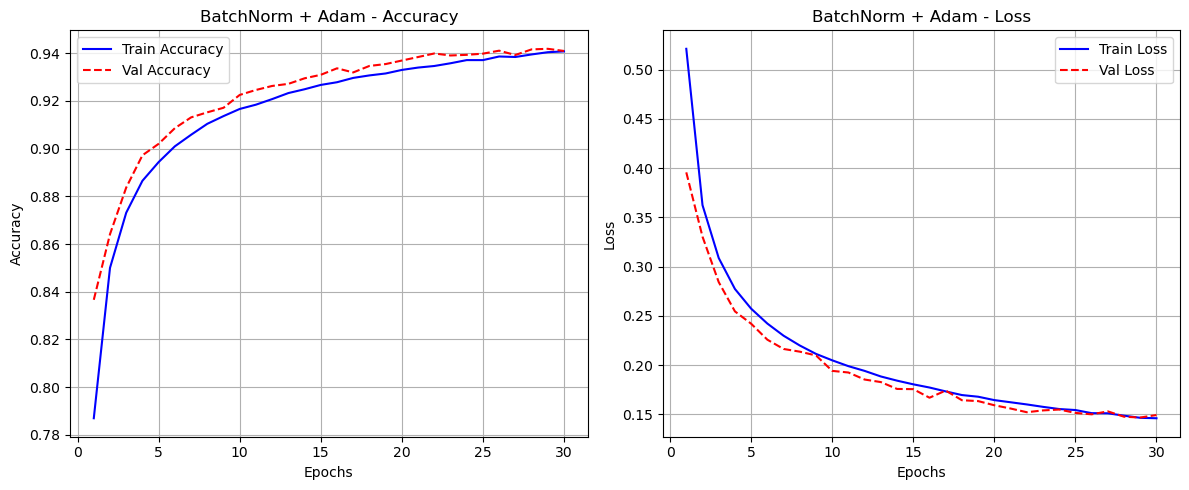

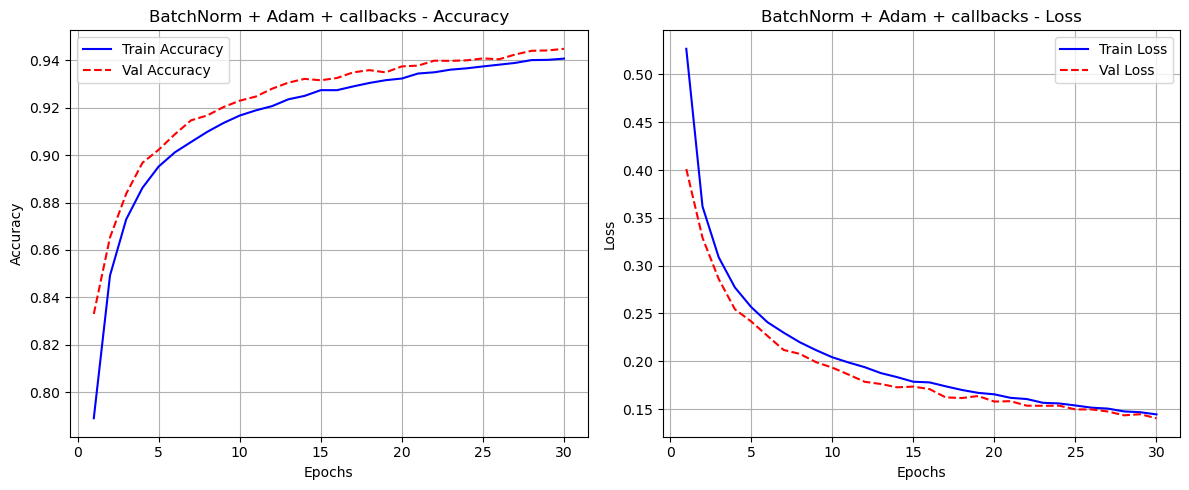

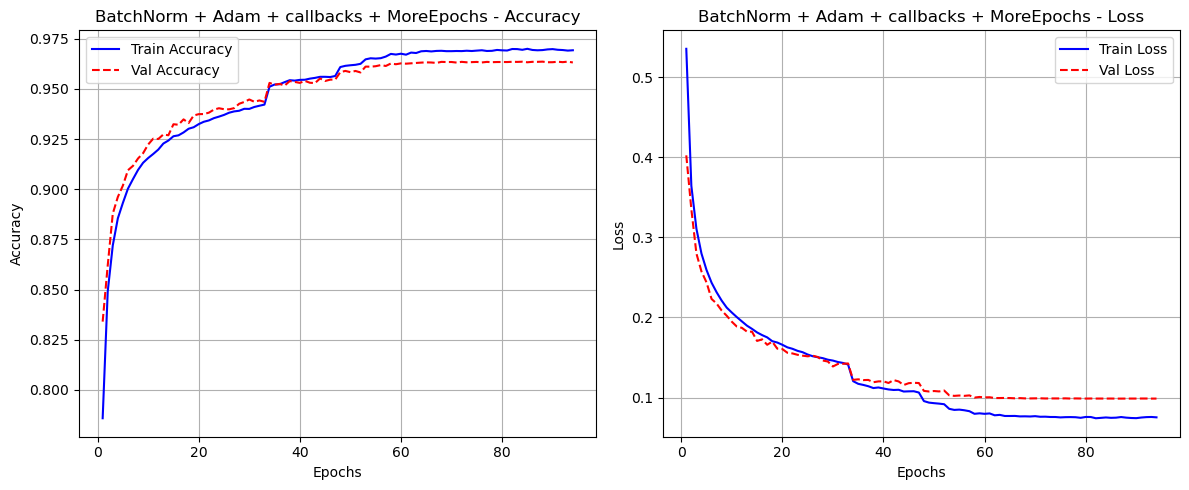

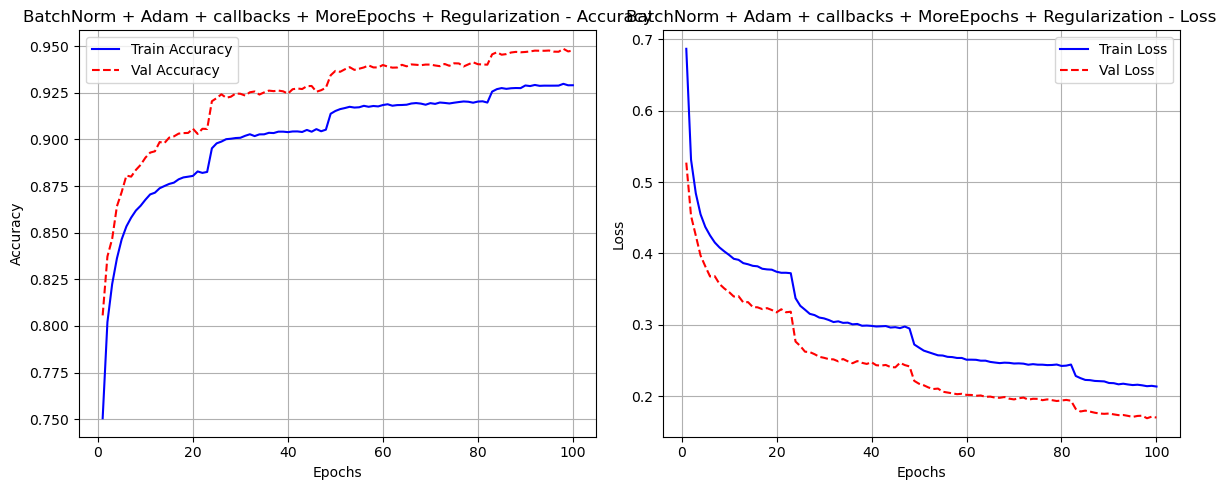

In [ ]:
for name, history in histories.items():
    plot_learning_curves(history, title=name)


Final Summary of all Models:

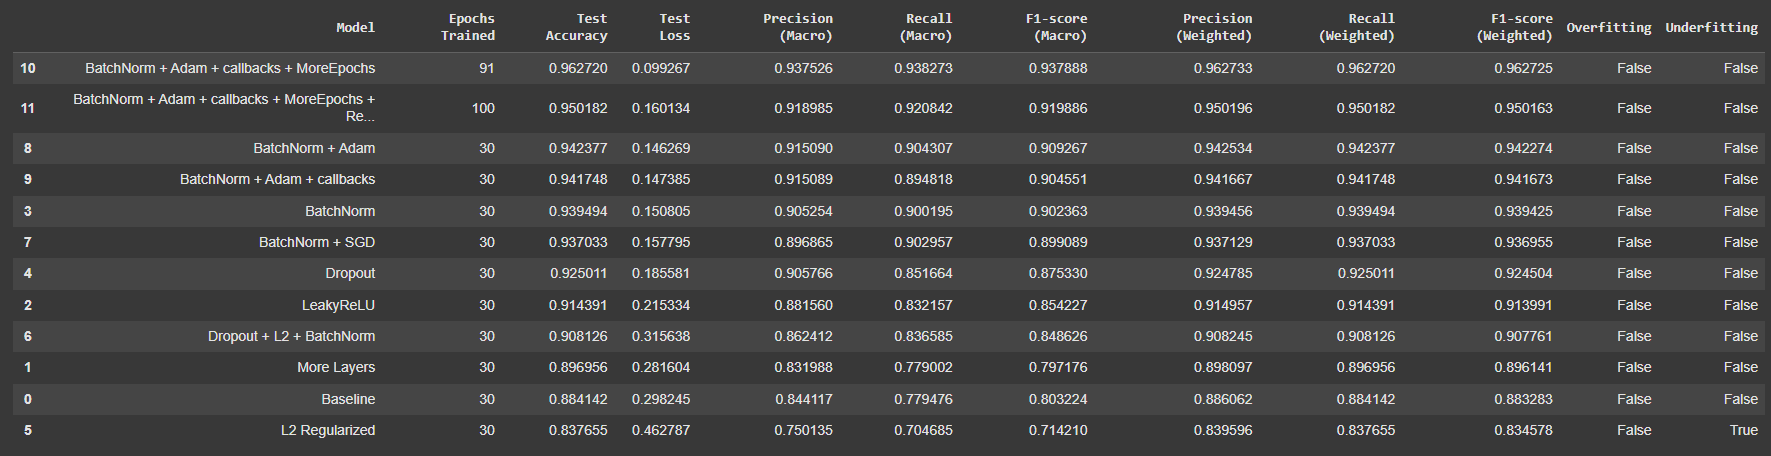

So in the summary above it can be seen that 94% acuracy was achived using just BatchNormalization and Adam ,
and by using BatchNormalization,Adam,callbacks and more epochs an accuracy of 96% was achived.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

In [ ]:

rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay

In [ ]:
# Accuracy on training set
train_preds = rf_clf.predict(X_train)
train_acc = accuracy_score(y_train, train_preds)
print("Train Accuracy:", round(train_acc, 4))

# Accuracy on test set
test_preds = rf_clf.predict(X_test)
test_acc = accuracy_score(y_test, test_preds)
print("Test Accuracy:", round(test_acc, 4))

Train Accuracy: 1.0
Test Accuracy: 0.9533


Test Accuracy: 0.9533

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     42368
           1       0.95      0.97      0.96     56661
           2       0.94      0.96      0.95      7151
           3       0.92      0.86      0.89       549
           4       0.95      0.77      0.85      1899
           5       0.93      0.89      0.91      3473
           6       0.97      0.95      0.96      4102

    accuracy                           0.95    116203
   macro avg       0.95      0.91      0.92    116203
weighted avg       0.95      0.95      0.95    116203



<Figure size 800x600 with 0 Axes>

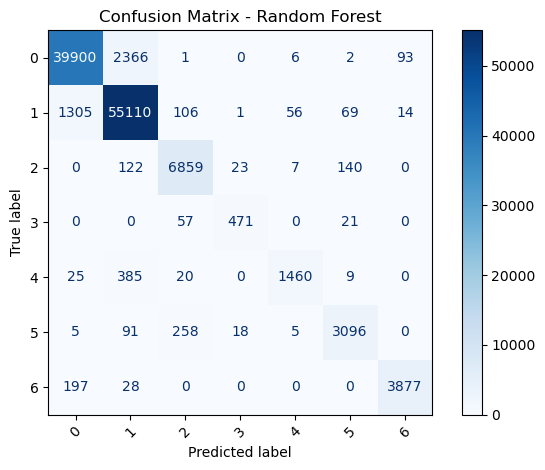

In [ ]:
y_pred = rf_clf.predict(X_test)

# 3. Print accuracy
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# 4. Print classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))

# 5. Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 6. Define class labels
class_labels = sorted(np.unique(y_test))  # e.g., [0, 1, 2, 3, 4, 5, 6]

# 7. Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Random Forest")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:


# 2. Predict on test set
y_pred_rf = rf_clf.predict(X_test)

# 3. Accuracy
test_accuracy = accuracy_score(y_test, y_pred_rf)

# 4. Classification Report
rf_report = classification_report(y_test, y_pred_rf, output_dict=True, zero_division=0)

# 5. Confusion Matrix (for multiclass)
cm = confusion_matrix(y_test, y_pred_rf)

# 6. Manually calculate global TP, FP, TN, FN (aggregated across all classes)
TP = np.trace(cm)  # sum of true positives (diagonal)
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TN = cm.sum() - (TP + FP + FN)
# Accuracy on training set
train_preds = rf_clf.predict(X_train)
train_acc = accuracy_score(y_train, train_preds)
print("Train Accuracy:", round(train_acc, 4))

# Accuracy on test set
test_preds = rf_clf.predict(X_test)
test_acc = accuracy_score(y_test, test_preds)
print("Test Accuracy:", round(test_acc, 4))
# 7. Store results
rf_results_df = pd.DataFrame([{
    'Model': 'Random Forest',
    'Epochs Trained': 0,
    'Test Accuracy': test_accuracy,
    'Test Loss': None,
    'Precision (Macro)': rf_report['macro avg']['precision'],
    'Recall (Macro)': rf_report['macro avg']['recall'],
    'F1-score (Macro)': rf_report['macro avg']['f1-score'],
    'Precision (Weighted)': rf_report['weighted avg']['precision'],
    'Recall (Weighted)': rf_report['weighted avg']['recall'],
    'F1-score (Weighted)': rf_report['weighted avg']['f1-score'],
    'TP': TP,
    'FP': FP.sum(),
    'TN': TN,
    'FN': FN.sum(),
    'Overfitting': train_acc > (test_acc + 0.015),
    'Underfitting': (train_acc < 0.85) and (test_acc < 0.85)
}])




Train Accuracy: 1.0
Test Accuracy: 0.9533


In [ ]:
# 8. Display results
rf_results_df

,Model,Epochs Trained,Test Accuracy,Test Loss,Precision (Macro),Recall (Macro),F1-score (Macro),Precision (Weighted),Recall (Weighted),F1-score (Weighted),TP,FP,TN,FN,Overfitting,Underfitting
0,Random Forest,0,0.953271,None,0.945971,0.90527,0.923951,0.953402,0.953271,0.953031,110773,5430,"[1430, 887, 4696, 5310, 4917, 4812, 5098]",5430,True,False


In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [10, 20, None],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
#     'max_features': ['sqrt', 'log2']
# }

# rf = RandomForestClassifier(random_state=42)
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
#                            cv=3, scoring='accuracy', n_jobs=-1, verbose=10)

# grid_search.fit(X_train, y_train)

# print("Best Parameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)

In [ ]:
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)

# from sklearn.metrics import classification_report, confusion_matrix
# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

In [ ]:
# # Accuracy on training set
# train_preds = best_model.predict(X_train)
# train_acc = accuracy_score(y_train, train_preds)
# print("Train Accuracy:", round(train_acc, 4))

# # Accuracy on test set
# test_preds = best_model.predict(X_test)
# test_acc = accuracy_score(y_test, test_preds)
# print("Test Accuracy:", round(test_acc, 4))

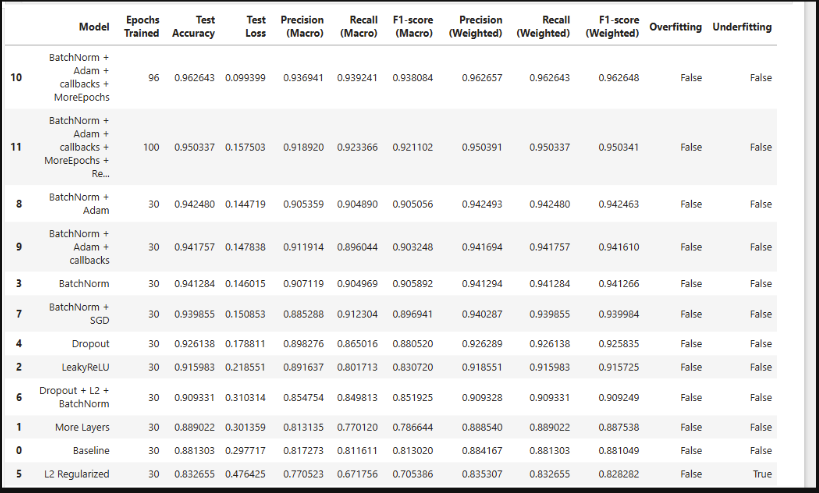

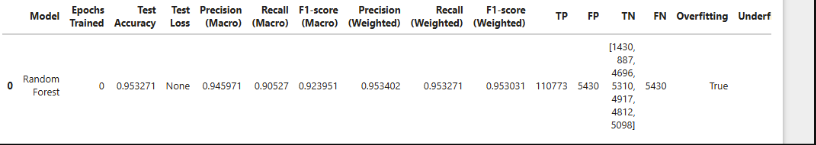

Random Forest :

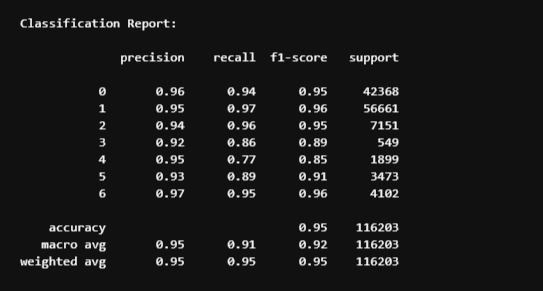

Best Deep Learning Model:

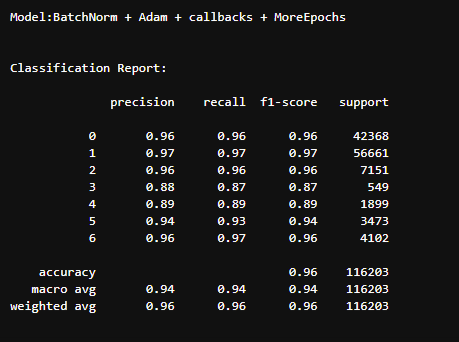

Based on my results, MLPs slightly outperformed Random Forest in terms of test accuracy and F1-score, especially with more training epochs and regularization. However, Random Forest achieved strong performance (95.4% accuracy) with minimal tuning and no risk of overfitting despite a perfect training score. This shows that while MLPs can surpass RF with careful optimization, tree-based models are more efficient and robust on structured/tabular data.